<a href="https://colab.research.google.com/github/Evelyn4231/Dataset/blob/main/DAS_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
# Especifica la ruta completa al archivo CSV
filename = '/content/drive/MyDrive/Colab Notebooks/data.csv'

Mounted at /content/drive


In [ ]:
data = pd.read_csv(filename, delimiter='\t', encoding='utf-8')
data.head()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
0,4,28,3890,4,25,2122,2,16,1944,4,...,1,1,1,12,1,10,2,1,2,NaN
1,4,2,8118,1,36,2890,2,35,4777,3,...,2,1,2,7,0,70,2,1,4,NaN
2,3,7,5784,1,33,4373,4,41,3242,1,...,2,1,1,4,3,60,1,1,3,NaN
3,2,23,5081,3,11,6837,2,37,5521,1,...,2,1,2,4,5,70,2,1,5,biology
4,2,36,3215,2,13,7731,3,5,4156,4,...,2,2,3,10,1,10,2,1,4,Psychology


In [ ]:
data_1=data.copy()
data_1['major']=data_1['major'].replace(np.nan,'No Degree')
time = [i for i in data_1.iloc[:,0:126] if  'E' in i]
position = [i for i in data_1.iloc[:,0:126] if  'I' in i]
data_1=data_1.drop(position,axis=1)
data_1=data_1.drop(time,axis=1)
data_1=data_1.drop(data_1.iloc[:,43:47],axis=1)
data_2=data_1.copy()
data_2=data_2.drop(data_2.iloc[:,53:69],axis=1)
data_2=data_2.replace(to_replace=0,value=3)
data_2=data_2.rename(columns={'TIPI1':'Extraverted-enthusiastic','TIPI2':'Critical-quarrelsome',
                            'TIPI3':'Dependable-self_disciplined','TIPI4':'Anxious-easily upset',
                            'TIPI5':'Open to new experiences-complex','TIPI6':'Reserved-quiet',
                            'TIPI7':'Sympathetic-warm','TIPI8':'Disorganized-careless','TIPI9':'Calm-emotionally_stable',
                            'TIPI10':'Conventional-uncreative'})
print('Shape',data_2.shape)
print('Attributes',data_2.columns)

Shape (39775, 68)
Attributes Index(['Q1A', 'Q2A', 'Q3A', 'Q4A', 'Q5A', 'Q6A', 'Q7A', 'Q8A', 'Q9A', 'Q10A',
       'Q11A', 'Q12A', 'Q13A', 'Q14A', 'Q15A', 'Q16A', 'Q17A', 'Q18A', 'Q19A',
       'Q20A', 'Q21A', 'Q22A', 'Q23A', 'Q24A', 'Q25A', 'Q26A', 'Q27A', 'Q28A',
       'Q29A', 'Q30A', 'Q31A', 'Q32A', 'Q33A', 'Q34A', 'Q35A', 'Q36A', 'Q37A',
       'Q38A', 'Q39A', 'Q40A', 'Q41A', 'Q42A', 'country',
       'Extraverted-enthusiastic', 'Critical-quarrelsome',
       'Dependable-self_disciplined', 'Anxious-easily upset',
       'Open to new experiences-complex', 'Reserved-quiet', 'Sympathetic-warm',
       'Disorganized-careless', 'Calm-emotionally_stable',
       'Conventional-uncreative', 'education', 'urban', 'gender', 'engnat',
       'age', 'screensize', 'uniquenetworklocation', 'hand', 'religion',
       'orientation', 'race', 'voted', 'married', 'familysize', 'major'],
      dtype='object')


In [ ]:
data_1.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
0,4,4,2,4,4,4,4,4,2,1,...,1,1,1,12,1,10,2,1,2,No Degree
1,4,1,2,3,4,4,3,4,3,2,...,2,1,2,7,0,70,2,1,4,No Degree
2,3,1,4,1,4,3,1,3,2,4,...,2,1,1,4,3,60,1,1,3,No Degree
3,2,3,2,1,3,3,4,2,3,3,...,2,1,2,4,5,70,2,1,5,biology
4,2,2,3,4,4,2,4,4,4,3,...,2,2,3,10,1,10,2,1,4,Psychology


In [ ]:
def condition(title):
    if 'busin' in str(title).lower() or 'manage' in str(title).lower() or 'Buss' in str(title) or 'Bisness' in str(title) or 'Manag' in str(title) or 'buis' in str(title) or 'Entrepreneur' in str(title) or 'entrepr' in str(title).lower() or 'managment' in str(title).lower() or 'Buis' in str(title) or 'Busni' in str(title) or 'Mana' in str(title) or 'buss' in str(title).lower() or 'Bi' in str(title) or 'Mgt' in str(title) or 'MBA' in str(title) or 'Mgmt' in str(title) or 'MD' in str(title):
        return 'Business/Management'
    elif 'information technology' in str(title).lower() or 'IT' in str(title) or 'it' in str(title):
        return 'I.T'
    elif 'math' in str(title).lower() or 'LOGISTICS' in str(title) or 'st' in str(title).lower() or 'marh' in str(title).lower() or 'Mate' in str(title):
        return 'Mathematics'
    elif 'computer' in str(title).lower():
        return 'I.T'
    elif 'bio' in str(title).lower() or 'Plant' in str(title) or 'plant' in str(title).lower() or 'Micro' in str(title):
        return 'Biology'
    elif 'tesl' in str(title).lower() or 'TES' in str(title) or 'Teso' in str(title) or 'Enhlish' in str(title):
        return 'English'
    elif 'account' in str(title).lower() or 'Accoun' in str(title) or 'Acc' in str(title) or 'acc' in str(title).lower() or 'Acouunt' in str(title) or 'Acvount' in str(title) or 'Count' in str(title):
        return 'Accountacy'
    elif 'CA' in str(title):
        return 'CA'
    elif 'none' in str(title).lower() or '0' in str(title) or  '_' in str(title) or '.' in str(title) or 'Nine' in str(title) or '19' in str(title):
        return 'No Degree'
    elif 'nurs' in str(title).lower() or 'BSN' in str(title):
        return 'Nursing'
    elif '-' in str(title).lower() or 'NIL' in str(title):
        return 'No Degree'
    elif 'teach' in str(title).lower() or 'Lect' in str(title) or 'eet' in str(title).lower():
        return 'Teaching'
    elif 'pharma' in str(title).lower() or 'medic' in str(title).lower() or 'med' in str(title).lower() or 'hospi' in str(title).lower() or 'Mwdicine' in str(title) or 'Farmacy' in str(title) or 'Pharacology' in str(title) or 'farmasi' in str(title).lower() or 'Farmasy' in str(title):
        return 'Pharmacy/Medical'
    elif 'doctor' in str(title).lower() or  'MBBS' in str(title) or 'Mbbs' in str(title) or 'Surge' in str(title) or 'surge' in str(title) or 'mbbs' in str(title).lower()or 'dermat' in str(title).lower() or 'Podiat' in str(title) :
        return 'Doctor'
    elif 'no' in str(title).lower() or 'Undec' in str(title) or 'Idk' in str(title) or 'idk' in str(title).lower() or 'Hahaha' in str(title) or 'never' in str(title).lower() or 'T' in str(title) or 'Good' in str(title):
        return 'No Degree'
    elif 'film' in str(title).lower() or 'Cinema' in str(title) or 'fil' in str(title).lower() or 'Adver' in str(title) or 'adver' in str(title) or 'Act' in str(title) or 'Enter' in str(title) or 'digital' in str(title).lower() or 'cinema' in str(title).lower() or 'Video' in str(title) or 'Direct' in str(title) or 'Theat' in str(title) or 'Radio' in str(title) or 'theat' in str(title).lower() or 'drama' in str(title).lower():
        return 'Media'
    elif 'international' in str(title).lower() or 'Internatianal' in str(title):
        return 'International Relations'
    elif 'human' in str(title).lower() or 'hr' in str(title).lower() or 'Hs' in str(title) or 'Hm' in str(title) or 'Humam' in str(title):
        return 'Human Resources'
    elif 'art' in str(title).lower() or 'Painting' in str(title) or 'Drawing' in str(title) or 'ba' in str(title) or 'Printing' in str(title) or 'las' in str(title).lower() or 'Ma' in str(title) or 'paint' in str(title).lower() or 'creative' in str(title).lower() or 'AA' in str(title) or 'BA' in str(title):
        return 'Arts'
    elif 'islam' in str(title).lower() or 'Muamalat' in str(title) or 'Quran' in str(title) or 'Halal' in str(title) or 'Usul' in str(title) or 'Zakat' in str(title) or 'usul' in str(title).lower():
        return 'Islamic Studies'
    elif 'physio' in str(title).lower() or 'fis' in str(title).lower():
        return 'Physiotherapy'
    elif 'socio' in str(title).lower() or 'social' in str(title).lower() or 'soical' in str(title).lower() or 'Sis' in str(title) or 'Sosio' in str(title) or 'Sicio' in str(title) or 'sosiality' in str(title).lower():
        return 'Sociology'
    elif 'bank' in str(title).lower():
        return 'Banking'
    elif 'agri' in str(title).lower():
        return 'Agriculture'
    elif 'Market' in str(title) or 'Finan' in str(title) or 'finance' in str(title).lower() or 'MARKETING' in str(title) or 'market' in str(title).lower() or 'retail' in str(title).lower() or 'CMP' in str(title) or 'Merket' in str(title):
        return 'Marketing/Finance'
    elif 'counsel' in str(title).lower() or 'cauns' in str(title) or 'Kaunseling' in str(title) or 'kaunseling' in str(title) or 'Caunsel' in str(title):
        return 'Counselling'
    elif 'programming' in str(title).lower() or 'coding' in str(title).lower() or 'Ibm' in str(title) or 'ceit' in str(title) or 'Hacking' in str(title):
        return 'I.T'
    elif 'civil' in str(title).lower() or 'comp' in str(title).lower() or 'Mechanical' in str(title) or 'Electrical' in str(title) or 'Mechatronics' in str(title) or 'Eee' in str(title) or 'cs' in str(title).lower() or 'mecha' in str(title) or 'Chemical' in str(title) or 'chemical' in str(title) or 'tech' in str(title) or 'ec' in str(title).lower() or 'egineering' in str(title).lower() or 'manufacturing' in str(title).lower():
        return 'Engineering'
    elif 'ict' in str(title).lower() or 'developer' in str(title).lower() or 'I.T' in str(title) or 'CAE&D' in str(title) or 'It' in str(title):
        return 'I.T'
    elif 'commu' in str(title).lower() or 'comm' in str(title).lower() or 'com' in str(title).lower() or 'Conmunication' in str(title):
        return 'Communications'
    elif 'administration' in str(title).lower() or 'admin' in str(title).lower():
        return 'Administration'
    elif 'psycho' in str(title).lower() or 'psy' in str(title).lower() or 'Clinical osychology' in str(title) or 'hschology' in str(title) or 'Pysch' in str(title) or 'pys' in str(title).lower() or 'Pych' in str(title) or 'pscy' in str(title) or 'payc' in str(title).lower() or 'Phyc' in str(title) or 'psicologia' in str(title) or 'Phsychology' in str(title) or 'Phichology' in str(title) or 'psuchology' in str(title) or 'Pschology' in str(title) or 'psikologi' in str(title).lower():
        return 'Psychology'
    elif 'english' in str(title).lower() or 'Elglish' in str(title) or 'esl' in str(title).lower() or 'Emg' in str(title) or 'emglisj' in str(title).lower():
        return 'English'
    elif 'law' in str(title).lower() or 'BBA' in str(title) or 'llb' in str(title) or 'lew' in str(title).lower() or 'kaw' in str(title).lower() or 'enforcement' in str(title).lower() or 'Kaw' in str(title):
        return 'Law'
    elif 'engineering' in str(title).lower() or 'engi' in str(title).lower() or 'eng' in str(title).lower() or 'Software' in str(title) or 'soft' in str(title).lower() or 'mechanical' in str(title).lower() or 'Egineeering' in  str(title) or 'electronic' in str(title).lower() or 'CE' in str(title) or 'mech' in str(title).lower() or 'Ciclvil' in str(title) or 'Eggineering' in str(title) or 'Tech' in str(title) or 'Teol' in str(title) or 'EEE' in str(title) or 'PE' in str(title):
        return 'Engineering'
    elif 'architecture' in str(title).lower() or 'aechitecture' in str(title).lower() or 'archirecture' in str(title).lower() or 'architect' in str(title).lower() or 'Arsitechture' in str(title) or 'Building' in str(title) or 'building' in str(title).lower() or 'Arc' in str(title):
        return 'Architecture'
    elif 'design' in str(title).lower() or 'Desig' in str(title) or 'Dssign' in str(title):
        return 'Designer'
    elif 'science' in str(title).lower() or 'Sceince' in str(title) or 'Sci' in str(title) or 'sciene' in str(title) or 'BS' in str(title):
        return 'Pure Sciences'
    elif 'physics' in str(title).lower() or 'Phsyics' in str(title) or 'EMC' in str(title) or 'Physic' in str(title) or 'physi' in str(title):
        return 'Physics'
    elif 'chemistry' in str(title).lower() or 'CIS' in str(title) or 'Chem' in str(title):
        return 'Chemistry'
    elif 'french' in str(title).lower() or 'Fr' in str(title):
        return 'French'
    elif 'religi' in str(title).lower() or 'Relegion' in str(title) or 'Rel' in str(title) or 'Hukum' in str(title) or 'Sains' in str(title):
        return 'Religious Studies'
    elif title=='&#1593;&#1604;&#1605; &#1606;&#1601;&#1587;' or title=='&#22810;&#23186;&#39636;&#35373;&#35336;' or title=='nil' or title=='drop out' or title=='&#1055;&#1089;&#1080;&#1093;&#1086;&#1083;&#1' or title=='75' or title=='Secondary education' or title=='Thiê&#769;t kê&#769; &#273;ô&#768; ho&#803;a' or title=='18' or title=='ongoing' or title=='&#28888;&#22521;' or title=='lol' or title=='In college currently' or title=='secondary education' or title=='Dropped out' or title=='na' or title=='didnt attend' or title=='im going on the next year. ' or title=='&#304;lahiyat' or title=='lmfao, im 15' or title=='Elem Ed' or title=='yes' or title=='N/a' or title=='/' or title=='???' or title=='cocaine 101' or title=='doesnt matter' or title== 'oooo' or title=='G' or title=='Yes' or title=='Na' or title=='Na 'or title=='Want sure':
        return 'No Degree'
    elif 'Music' in str(title) or 'Dance' in str(title) or 'danc' in str(title).lower() or 'Vocational' in str(title) or 'Muisc' in str(title) or 'music' in str(title).lower() or 'Performance' in str(title):
        return 'Music/Dance'
    elif 'pol' in str(title).lower() or 'Govern' in str(title) or 'Right' in str(title):
        return 'Politics'
    elif 'photo' in str(title).lower() or 'Foto' in str(title) or 'Photo' in str(title):
        return 'Photography'
    elif 'Television' in str(title) or 'telev' in str(title).lower():
        return 'Television'
    elif 'bahasa' in str(title).lower() or 'Bahasa' in str(title) or 'Malay' in str(title) or 'malay' in str(title).lower():
        return 'Malaysian languages'
    elif 'Urban' in str(title) or 'Town' in str(title) or 'town' in str(title).lower() or 'planning' in str(title) or 'Plann' in str(title) or 'development' in str(title):
        return 'Economic Developments'
    elif 'Public' in str(title) or 'public' in str(title).lower():
        return 'Public Relations'
    elif 'Writing' in str(title) or 'writing' in str(title).lower() or 'Screenwritinf' in str(title) or 'Author' in str(title):
        return 'Writing/Author'
    elif 'philosophy' in str(title).lower() or 'Phil' in str(title) or 'philos' in str(title).lower() or 'Filo' in str(title) or 'Phylosophy' in str(title):
        return 'Philosophy'
    elif 'Actua' in str(title):
        return 'Acturial Studies'
    elif 'DENTALWORKS' in str(title) or 'dental' in str(title) or 'Dental' in str(title) or 'Odont' in str(title):
        return 'Dentist'
    elif 'beaut' in str(title).lower() or 'Fashion' in str(title) or 'make' in str(title) or 'fashion' in str(title).lower() or 'hair' in str(title).lower() or 'cosmet' in str(title).lower():
        return 'Fashion'
    elif 'Health' in str(title) or 'health' in str(title).lower() or 'wellness' in str(title).lower() or 'Healtcare' in str(title):
        return 'Healthcare'
    elif 'Language' in str(title) or 'lang' in str(title).lower() or 'Laq' in str(title):
        return 'Languages'
    elif 'cook' in str(title).lower() or 'bakery' in str(title).lower() or 'Bak' in str(title) or 'CULINARY' in str(title) or 'Food' in str(title) or 'food' in str(title) or 'chef' in str(title).lower() or 'Cul' in str(title) or 'Patiss' in str(title) or 'culi' in str(title).lower():
        return 'Cookings'
    elif 'Hotel' in str(title) or 'hotel' in str(title).lower() or 'food service' in str(title) or 'cater' in str(title).lower():
        return 'Hotel Management'
    elif 'therapy' in str(title).lower() or 'ot' in str(title).lower() or 'theraphy' in str(title):
        return 'Therapeutical Studies'
    elif 'veter' in str(title).lower() or 'Veter' in str(title) or 'Vet' in str(title):
        return 'Veterinary'
    elif 'Survey' in str(title) or 'survey' in str(title) or 'serveyors' in str(title).lower() or 'Qs' in str(title) or 'SURVEYING' in str(title) or 'QS' in str(title) or 'Surver' in str(title):
        return 'Surveyour Studies'
    elif 'Aircraft' in str(title) or 'aircraft' in str(title).lower() or 'aircr' in str(title).lower() or 'aviation' in str(title).lower() or 'Aero' in str(title) or 'navigation' in str(title).lower():
        return 'Aircrafts'
    elif 'environment' in str(title).lower() or 'Environment' in str(title) or 'envi' in str(title).lower():
        return 'Environmental Educations'
    elif 'Syariah' in str(title) or 'syariah' in str(title):
        return 'Syrian Languages'
    elif 'judicial' in str(title).lower() or 'juri' in str(title).lower() or 'legal' in str(title).lower():
        return 'Judicial Studies'
    elif 'Liter' in str(title) or 'literature' in str(title) or 'litt' in str(title).lower():
        return 'Literature'
    elif 'child' in str(title).lower() or 'Child' in str(title) or 'Preschool' in str(title):
        return 'Child Educations'
    elif 'Tour' in str(title) or 'tour'  in str(title).lower():
        return 'Tourisms'
    elif 'Gam' in str(title) or 'game' in str(title).lower():
        return 'Gaming'
    elif 'education' in str(title).lower() or 'Education' in str(title) or 'ed' in str(title).lower() or 'acad' in str(title) or 'Dploma' in str(title):
        return 'B.Ed or M.Ed'
    elif 'Sport' in str(title) or 'sport' in str(title).lower():
        return 'Sports'
    elif 'Petro' in str(title):
        return 'Petroleum'
    elif 'Journ' in str(title) or 'jour' in str(title).lower() or 'Joun' in str(title) or 'Jurn' in str(title):
        return 'Journalism'
    elif 'Mandarin' in str(title):
        return 'Chinese/Mandarin Languages'
    elif 'Electrician' in str(title):
        return 'Electrician'
    elif 'Network' in str(title) or 'network' in str(title).lower():
        return 'Networking'
    elif 'geo' in str(title).lower() or 'GEO' in str(title):
        return 'Geography'
    elif 'Librarian' in str(title) or 'lib' in str(title).lower():
        return 'Librarian'
    elif 'Mission' in str(title) or 'mission' in str(title).lower():
        return 'Missionary Studies'
    elif 'Forensic' in str(title) or 'foren' in str(title).lower() or 'Crime' in str(title) or 'crim' in str(title).lower():
        return 'Forensic/Criminal studies'
    elif 'Animation' in str(title) or 'animation' in str(title).lower() or 'imag' in str(title) or 'graphic' in str(title) or 'Graphic' in str(title):
        return 'Animations'
    elif 'aqua' in str(title).lower() or 'Aqu' in str(title):
        return 'Aquaculture'
    elif 'soldier' in str(title).lower() or 'lwa' in str(title).lower() or 'defence' in str(title):
        return 'Army'
    elif 'Kinesi' in str(title) or 'kines' in str(title).lower() or 'hod' in str(title):
        return 'Human Kinetics'
    elif 'Horti' in str(title) or 'horti' in str(title) or 'Landscape' in str(title):
        return 'Horticulture'
    elif 'commerce' in str(title).lower() or 'Coome' in str(title):
        return 'Commerce'
    elif 'Speech' in str(title) or 'speech' in str(title).lower():
        return 'Speech Pathology'
    elif 'SECRET' in str(title) or 'secret' in str(title).lower():
        return 'Secretary'
    elif 'Animals' in str(title) or 'animal' in str(title).lower() or 'Pet' in str(title):
        return 'Animal Care'
    elif 'Organisation' in str(title) or 'organi' in str(title).lower():
        return 'Organizational Behaviour'
    elif 'event' in str(title).lower() or 'Event' in str(title):
        return 'Event Managment'
    elif 'radiology' in str(title).lower() or 'Radiography' in str(title) or 'radiograpghy' in str(title).lower() or 'Radiation' in str(title) or 'radiography' in str(title):
        return 'Radiography'
    elif 'nutrition' in str(title).lower() or 'Nutrition' in str(title):
        return 'Nutritionist'
    elif 'Audit' in str(title) or 'audit' in str(title).lower():
        return 'Auditing'
    elif 'Neuro' in str(title) or 'neuroligy' in str(title).lower():
        return 'Neurology'
    elif 'Anato' in str(title) or 'anat' in str(title).lower():
        return 'Anatomy'
    elif 'trade' in str(title).lower():
        return 'Trading'
    elif 'Interpre' in str(title) or 'translation' in str(title).lower():
        return 'Interpreter'
    elif 'audio' in str(title).lower() or 'Audio' in str(title):
        return 'Audiology'
    elif 'insurance' in str(title).lower() or 'Insurance' in str(title):
        return 'Insurances'
    elif 'archaeology' in str(title).lower() or 'archaeology' in str(title).lower() or 'archeology' in str(title).lower() or 'treasury' in str(title):
        return 'Archeology'
    elif 'SERV'in str(title) or 'service' in str(title).lower():
        return 'Service Training'
    elif 'GERMAN' in str(title) or 'german' in str(title).lower():
        return 'German'
    elif 'KOREAN' in str(title) or 'Korea' in str(title):
        return 'Korean'
    elif 'valuat' in str(title).lower() or 'valuer' in str(title).lower():
        return 'Registered Valuer'
    elif 'skil' in str(title).lower() or 'Skill' in str(title) or 'Professional' in str(title) or 'practical' in str(title).lower():
        return 'Skilled Labour'
    elif 'virology' in str(title):
        return 'Virology'
    elif 'lab' in str(title).lower() or 'Lab' in str(title) or 'MLT' in str(title):
        return 'Laboratory Worker'
    elif 'GENERAL' in str(title) or 'General' in str(title):
        return 'General'
    elif 'Opto' in str(title) or 'opto' in str(title).lower():
        return 'Optometry'
    elif 'Zoo' in str(title) or 'zoo' in str(title).lower():
        return 'Zoology'
    elif 'office' in str(title).lower() or 'Office' in str(title):
        return 'Office Skills'
    elif 'found' in str(title).lower() or 'Found' in str(title):
        return 'Foundation Education'
    elif 'general' in str(title).lower() or 'General' in str(title):
        return 'General Education'
    elif 'real estate' in str(title).lower() or 'property' in str(title).lower():
        return 'Realtor'
    elif 'Meteorology' in str(title) or 'Metrology' in str(title):
        return 'Meterology'
    elif 'operations' in str(title).lower() or 'Operation' in str(title):
        return 'Operational Managment'
    elif 'Merchandising' in str(title) or 'merchand' in str(title).lower():
        return 'Merchandising'
    elif 'Spanish' in str(title):
        return 'Spanish'
    elif 'Nature' in str(title) or 'natur' in str(title).lower():
        return 'Nature Conservation/Resources'
    elif title=='a level ' or title==' ':
        return 'No Degree'
    elif 'Corporate' in str(title) or 'corporate' in str(title).lower():
        return 'Corporate'
    elif 'greek' in str(title).lower() or 'Greek' in str(title):
        return 'Greek'
    elif 'Behaviour' in str(title) or 'Behavior' in str(title) or 'Organizational Behaviour' in str(title):
        return 'Behaviour Analysis'
    elif 'publish' in str(title).lower():
        return 'Publishing'
    elif 'Safety' in str(title) or 'safety' in str(title).lower():
        return 'Safety Training'
    elif 'genetic' in str(title).lower() or 'Genetic' in str(title):
        return 'Genetics'
    elif 'Dietetic' in str(title):
        return 'Dietician'
    elif 'Production' in str(title) or 'manufacturing' in str(title).lower():
        return 'Production And Manufacturing'
    elif 'Welding' in str(title):
        return 'Welding'
    elif 'Geron' in str(title):
        return 'Gerontology'
    elif 'Research' in str(title) or 'Ph D' in str(title):
        return 'Ph.D'
    elif 'arabic' in str(title).lower() or 'Arabic' in str(title):
        return 'Arabic'

    else:
        return title

data_2['major'] = data_2['major'].apply(condition)

In [ ]:
lis=[]
for x in data_2['major']:
    lis.append(x)
print(set(lis))

{'Anatomy', 'Operational Managment', 'Commerce', 'Registered Valuer', 'Agriculture', 'Corrosion ', 'Radiography', 'usa', 'Music/Dance', 'Army', 'Animal Care', 'Chinese', 'Gerontology', 'Sociology', 'Arabic', 'hvac', 'Spanish', 'Tourisms', 'Nursing', 'Media', 'harvard', 'College diploma', 'Corporate', 'Geography', 'Palaeontology', 'Pharmacy/Medical', 'Biology', 'Journalism', 'Pathology', 'Welding', 'Chemistry', 'Builders', 'Bachelor', 'Danish', 'Meterology', 'Petroleum', 'Foundation Education', 'epidemiology', 'Librarian', 'Museology', 'Child Educations', 'Arts', 'Missionary Studies', 'Leadership', 'Healthcare', 'Zoology', 'theology', 'Service Training', 'Languages', 'Publishing', 'Marketing/Finance', 'Designer', 'Hotel Management', 'Public Relations', 'Dentist', 'Realtor', 'Cretive Visual', 'Virology', 'Archeology', 'Information', 'Event Managment', 'Doctor', 'Russian philology', 'Neurology', 'Sculpture', 'Teaching', 'Production And Manufacturing', 'General', 'midwivery', 'Youth Work',

In [ ]:
data_2=data_2.replace([np.inf, -np.inf], np.nan)
data_2=data_2.dropna()

Text(0.5, 1.0, 'Las 20 principales especialidades de personas que participaron en la encuesta')

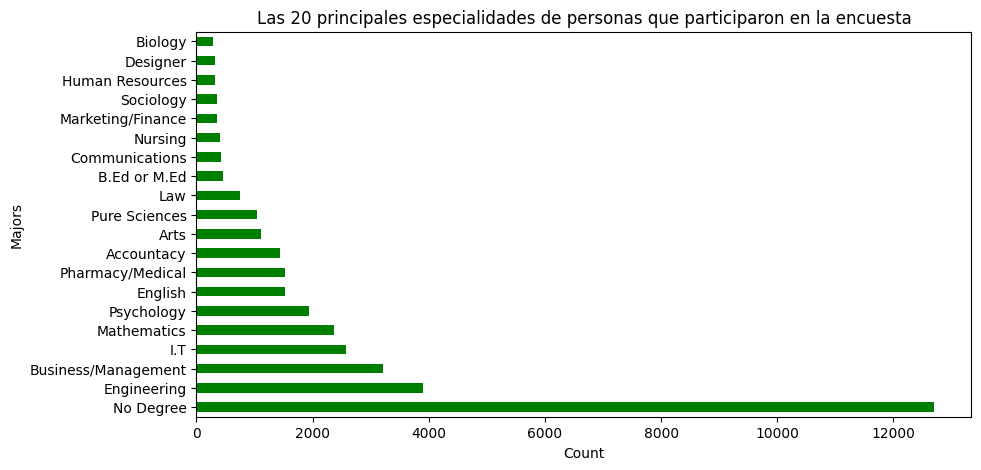

In [ ]:
plt.figure(figsize=(10,5))
data_2['major'].value_counts()[:20].plot(kind='barh',color='green')
plt.ylabel('Majors')
plt.xlabel('Count')
plt.title('Las 20 principales especialidades de personas que participaron en la encuesta')

Text(0.5, 1.0, 'Los 20 principales países desde donde las personas participaron en la encuesta')

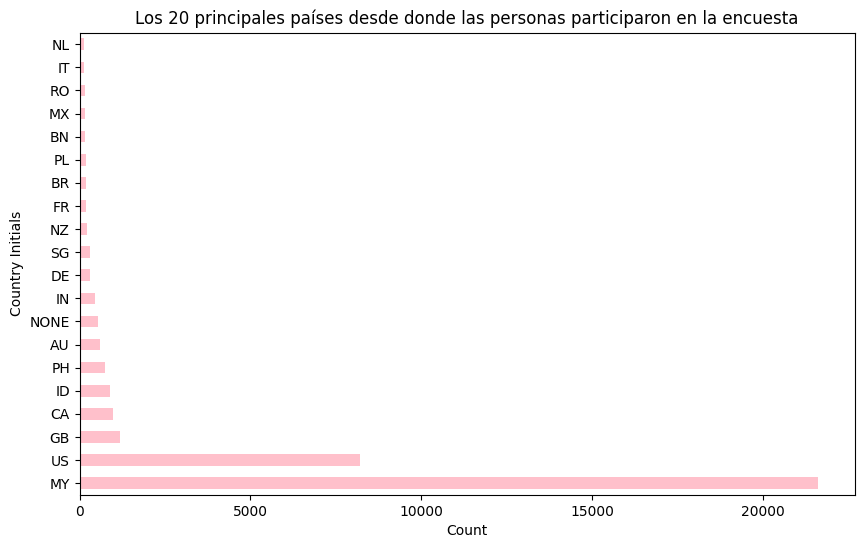

In [ ]:
plt.figure(figsize=(10,6))
data_2['country'].value_counts()[:20].plot(kind='barh',color='pink')
plt.ylabel('Country Initials')
plt.xlabel('Count')
plt.title('Los 20 principales países desde donde las personas participaron en la encuesta')

In [ ]:
def condition(x):
    if x<=10:
        return 'Under 10'
    if  10<=x<=16:
        return ' Primary Children'
    if 17<=x<=21:
        return 'Secondary Children'
    if 21<=x<=35:
        return 'Adults'
    if 36<=x<=48:
        return 'Elder Adults'
    if x>=49:
        return 'Older People'

data_2['Age_Groups']=data_2['age'].apply(condition)
data_2.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major,Age_Groups
0,4,4,2,4,4,4,4,4,2,1,...,1,1,12,1,10,2,1,2,No Degree,Primary Children
1,4,1,2,3,4,4,3,4,3,2,...,1,2,7,3,70,2,1,4,No Degree,Primary Children
2,3,1,4,1,4,3,1,3,2,4,...,1,1,4,3,60,1,1,3,No Degree,Secondary Children
3,2,3,2,1,3,3,4,2,3,3,...,1,2,4,5,70,2,1,5,Biology,Primary Children
4,2,2,3,4,4,2,4,4,4,3,...,2,3,10,1,10,2,1,4,Psychology,Secondary Children


In [ ]:
new_data=data_2.iloc[:,42:]
data_3=data_2.filter(regex='Q\d{1,2}A')
data_3.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,Q33A,Q34A,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A,Q42A
0,4,4,2,4,4,4,4,4,2,1,...,2,3,4,4,1,2,4,3,4,4
1,4,1,2,3,4,4,3,4,3,2,...,3,2,2,3,4,2,2,1,2,2
2,3,1,4,1,4,3,1,3,2,4,...,1,4,3,4,4,4,2,2,1,4
3,2,3,2,1,3,3,4,2,3,3,...,2,4,1,1,2,1,3,4,4,2
4,2,2,3,4,4,2,4,4,4,3,...,4,4,3,4,3,3,3,4,4,3


In [ ]:
def sub(data_3):
    return data_3.subtract(1,axis=1)
data_3=sub(data_3)
DASS_keys = {'Depression': [3, 5, 10, 13, 16, 17, 21, 24, 26, 31, 34, 37, 38, 42],
             'Anxiety': [2, 4, 7, 9, 15, 19, 20, 23, 25, 28, 30, 36, 40, 41],
             'Stress': [1, 6, 8, 11, 12, 14, 18, 22, 27, 29, 32, 33, 35, 39]}
Dep = []
for i in DASS_keys["Depression"]:
    Dep.append('Q'+str(i)+'A')
Stress = []
for i in DASS_keys["Stress"]:
    Stress.append('Q'+str(i)+'A')
Anx = []
for i in DASS_keys["Anxiety"]:
    Anx.append('Q'+str(i)+'A')
depression= data_3.filter(Dep)
stress = data_3.filter(Stress)
anxiety = data_3.filter(Anx)

In [ ]:
def scores(source):
    col=list(source)
    source['Total_Count']=source[col].sum(axis=1)
    return source
depression=scores(depression)
stress=scores(stress)
anxiety=scores(anxiety)

# **DATASET DEPRESION**

In [ ]:
depression.head()

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,Q34A,Q37A,Q38A,Q42A,Total_Count
0,1,3,0,3,3,2,0,3,3,3,2,0,1,3,27
1,1,3,1,3,2,3,1,1,2,1,1,3,1,1,24
2,3,3,3,3,3,3,3,3,0,3,3,3,3,3,39
3,1,2,2,0,1,2,0,0,1,2,3,1,0,1,16
4,2,3,2,3,2,3,2,1,3,2,3,2,2,2,32


In [ ]:
depression.shape

(39773, 15)

In [ ]:
Depression=pd.merge(depression,new_data,how='left',left_index=True,right_index=True)
Depression.head()

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,...,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major,Age_Groups
0,1,3,0,3,3,2,0,3,3,3,...,1,1,12,1,10,2,1,2,No Degree,Primary Children
1,1,3,1,3,2,3,1,1,2,1,...,1,2,7,3,70,2,1,4,No Degree,Primary Children
2,3,3,3,3,3,3,3,3,0,3,...,1,1,4,3,60,1,1,3,No Degree,Secondary Children
3,1,2,2,0,1,2,0,0,1,2,...,1,2,4,5,70,2,1,5,Biology,Primary Children
4,2,3,2,3,2,3,2,1,3,2,...,2,3,10,1,10,2,1,4,Psychology,Secondary Children


In [ ]:
def condition(x):
    if x<=9:
        return 'Normal'
    if  10<=x<=13:
        return 'Mild'
    if 14<=x<=20:
        return 'Moderate'
    if 21<=x<=27:
        return 'Severe'
    if x>28:
        return 'Extremely Severe'

Depression['Condition']=Depression['Total_Count'].apply(condition)
Depression.head()

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,...,hand,religion,orientation,race,voted,married,familysize,major,Age_Groups,Condition
0,1,3,0,3,3,2,0,3,3,3,...,1,12,1,10,2,1,2,No Degree,Primary Children,Severe
1,1,3,1,3,2,3,1,1,2,1,...,2,7,3,70,2,1,4,No Degree,Primary Children,Severe
2,3,3,3,3,3,3,3,3,0,3,...,1,4,3,60,1,1,3,No Degree,Secondary Children,Extremely Severe
3,1,2,2,0,1,2,0,0,1,2,...,2,4,5,70,2,1,5,Biology,Primary Children,Moderate
4,2,3,2,3,2,3,2,1,3,2,...,3,10,1,10,2,1,4,Psychology,Secondary Children,Extremely Severe


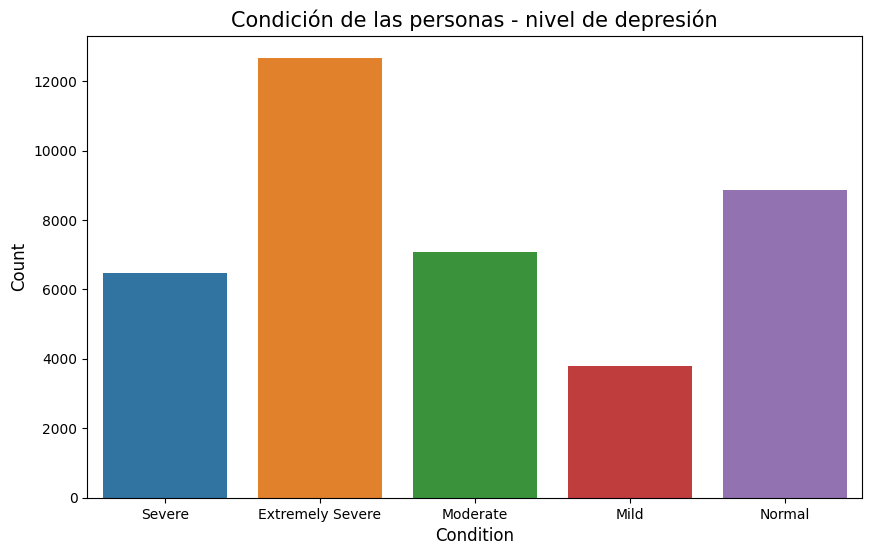

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=Depression, x='Condition')
plt.title('Condición de las personas - nivel de depresión', fontsize=15)
plt.xlabel('Condition', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

In [ ]:
Depr=Depression.copy()
def condition(x):
    if x<=9:
        return 0
    if  10<=x<=13:
        return 1
    if 14<=x<=20:
        return 2
    if 21<=x<=27:
        return 3
    if x>28:
        return 4

def cond(x):
    if x<=10:
        return 0
    if  10<=x<=16:
        return 1
    if 17<=x<=21:
        return 2
    if 21<=x<=35:
        return 3
    if 36<=x<=48:
        return 4
    if x>=49:
        return 5
Depr['Condition']=Depr['Total_Count'].apply(condition)
Depr['Age_Groups']=Depr['age'].apply(cond)
Depr=Depr.drop(columns=['age','Total_Count'])
Depr.head()

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,...,hand,religion,orientation,race,voted,married,familysize,major,Age_Groups,Condition
0,1,3,0,3,3,2,0,3,3,3,...,1,12,1,10,2,1,2,No Degree,1,3.0
1,1,3,1,3,2,3,1,1,2,1,...,2,7,3,70,2,1,4,No Degree,1,3.0
2,3,3,3,3,3,3,3,3,0,3,...,1,4,3,60,1,1,3,No Degree,2,4.0
3,1,2,2,0,1,2,0,0,1,2,...,2,4,5,70,2,1,5,Biology,1,2.0
4,2,3,2,3,2,3,2,1,3,2,...,3,10,1,10,2,1,4,Psychology,2,4.0


<ipython-input-22-7c66e865449c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Depr.corr(),vmin=-1,vmax=1,cmap=sns.diverging_palette(20,220,n=200))


<Axes: >

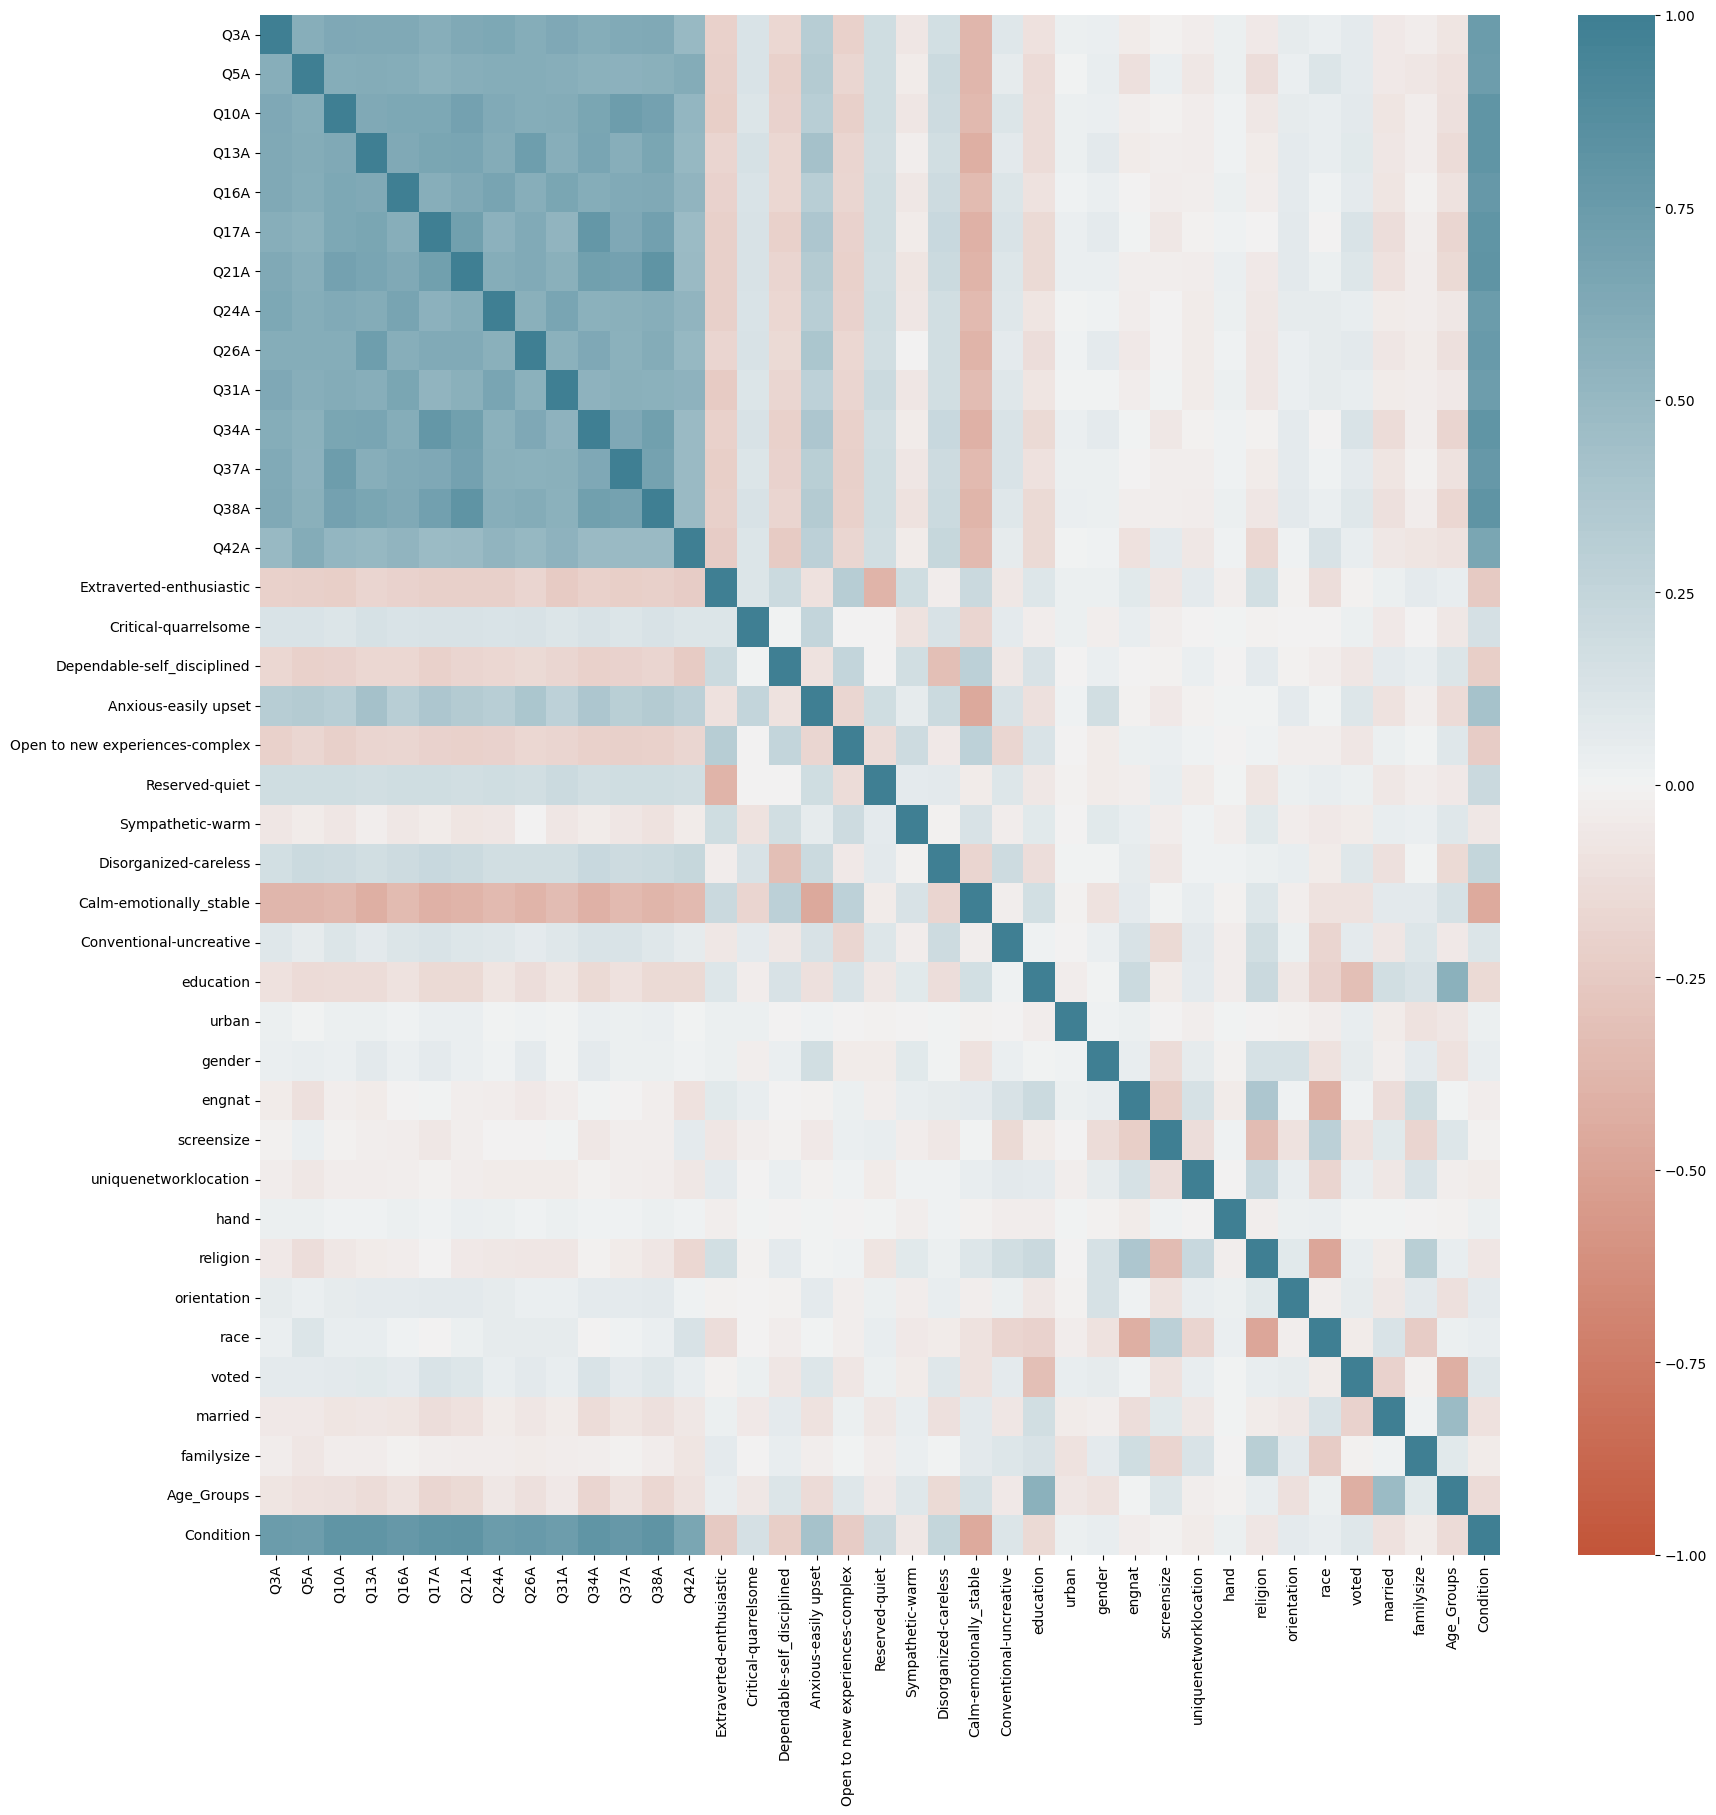

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(Depr.corr(),vmin=-1,vmax=1,cmap=sns.diverging_palette(20,220,n=200))

# **Dataset Estres**

In [ ]:
stress.head()

,Q1A,Q6A,Q8A,Q11A,Q12A,Q14A,Q18A,Q22A,Q27A,Q29A,Q32A,Q33A,Q35A,Q39A,Total_Count
0,3,3,3,3,3,3,3,3,3,3,3,1,3,3,40
1,3,3,3,1,1,3,1,2,2,2,2,2,1,1,27
2,2,2,2,1,0,0,1,2,1,1,2,0,2,1,17
3,1,2,1,1,0,3,0,0,3,2,0,1,0,2,16
4,1,1,3,1,3,3,3,2,1,1,3,3,2,2,29


In [ ]:
Stress=pd.merge(stress,new_data,how='inner',left_index=True,right_index=True)
Stress.head()

,Q1A,Q6A,Q8A,Q11A,Q12A,Q14A,Q18A,Q22A,Q27A,Q29A,...,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major,Age_Groups
0,3,3,3,3,3,3,3,3,3,3,...,1,1,12,1,10,2,1,2,No Degree,Primary Children
1,3,3,3,1,1,3,1,2,2,2,...,1,2,7,3,70,2,1,4,No Degree,Primary Children
2,2,2,2,1,0,0,1,2,1,1,...,1,1,4,3,60,1,1,3,No Degree,Secondary Children
3,1,2,1,1,0,3,0,0,3,2,...,1,2,4,5,70,2,1,5,Biology,Primary Children
4,1,1,3,1,3,3,3,2,1,1,...,2,3,10,1,10,2,1,4,Psychology,Secondary Children


In [ ]:
def condition(x):
    if x<=14:
        return 'Normal'
    if  15<=x<=18:
        return 'Mild'
    if 19<=x<=25:
        return 'Moderate'
    if 26<=x<=33:
        return 'Severe'
    if x>=34:
        return 'Extremely Severe'

Stress['Condition']=Stress['Total_Count'].apply(condition)

Stress.head()

,Q1A,Q6A,Q8A,Q11A,Q12A,Q14A,Q18A,Q22A,Q27A,Q29A,...,hand,religion,orientation,race,voted,married,familysize,major,Age_Groups,Condition
0,3,3,3,3,3,3,3,3,3,3,...,1,12,1,10,2,1,2,No Degree,Primary Children,Extremely Severe
1,3,3,3,1,1,3,1,2,2,2,...,2,7,3,70,2,1,4,No Degree,Primary Children,Severe
2,2,2,2,1,0,0,1,2,1,1,...,1,4,3,60,1,1,3,No Degree,Secondary Children,Mild
3,1,2,1,1,0,3,0,0,3,2,...,2,4,5,70,2,1,5,Biology,Primary Children,Mild
4,1,1,3,1,3,3,3,2,1,1,...,3,10,1,10,2,1,4,Psychology,Secondary Children,Severe


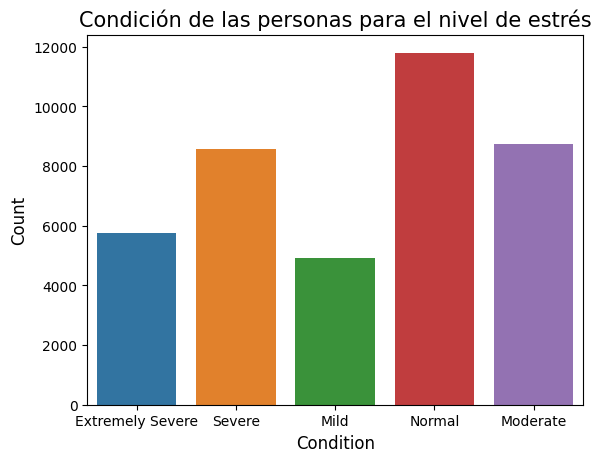

In [ ]:
sns.countplot(data=Stress, x='Condition')
plt.title('Condición de las personas para el nivel de estrés', fontsize=15)
plt.xlabel('Condition', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

In [ ]:
Str=Stress.copy()
def condition(x):
    if x<=9:
        return 0
    if  10<=x<=13:
        return 1
    if 14<=x<=20:
        return 2
    if 21<=x<=27:
        return 3
    if x>28:
        return 4

def cond(x):
    if x<=10:
        return 0
    if  10<=x<=16:
        return 1
    if 17<=x<=21:
        return 2
    if 21<=x<=35:
        return 3
    if 36<=x<=48:
        return 4
    if x>=49:
        return 5
Str['Condition']=Str['Total_Count'].apply(condition)
Str['Age_Groups']=Str['age'].apply(cond)
Str=Str.drop(columns=['age','Total_Count'])
Str.head()

,Q1A,Q6A,Q8A,Q11A,Q12A,Q14A,Q18A,Q22A,Q27A,Q29A,...,hand,religion,orientation,race,voted,married,familysize,major,Age_Groups,Condition
0,3,3,3,3,3,3,3,3,3,3,...,1,12,1,10,2,1,2,No Degree,1,4.0
1,3,3,3,1,1,3,1,2,2,2,...,2,7,3,70,2,1,4,No Degree,1,3.0
2,2,2,2,1,0,0,1,2,1,1,...,1,4,3,60,1,1,3,No Degree,2,2.0
3,1,2,1,1,0,3,0,0,3,2,...,2,4,5,70,2,1,5,Biology,1,2.0
4,1,1,3,1,3,3,3,2,1,1,...,3,10,1,10,2,1,4,Psychology,2,4.0


<ipython-input-28-6f9976271195>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Str.corr(),vmin=-1,vmax=1,cmap=sns.diverging_palette(20,220,n=200))


<Axes: >

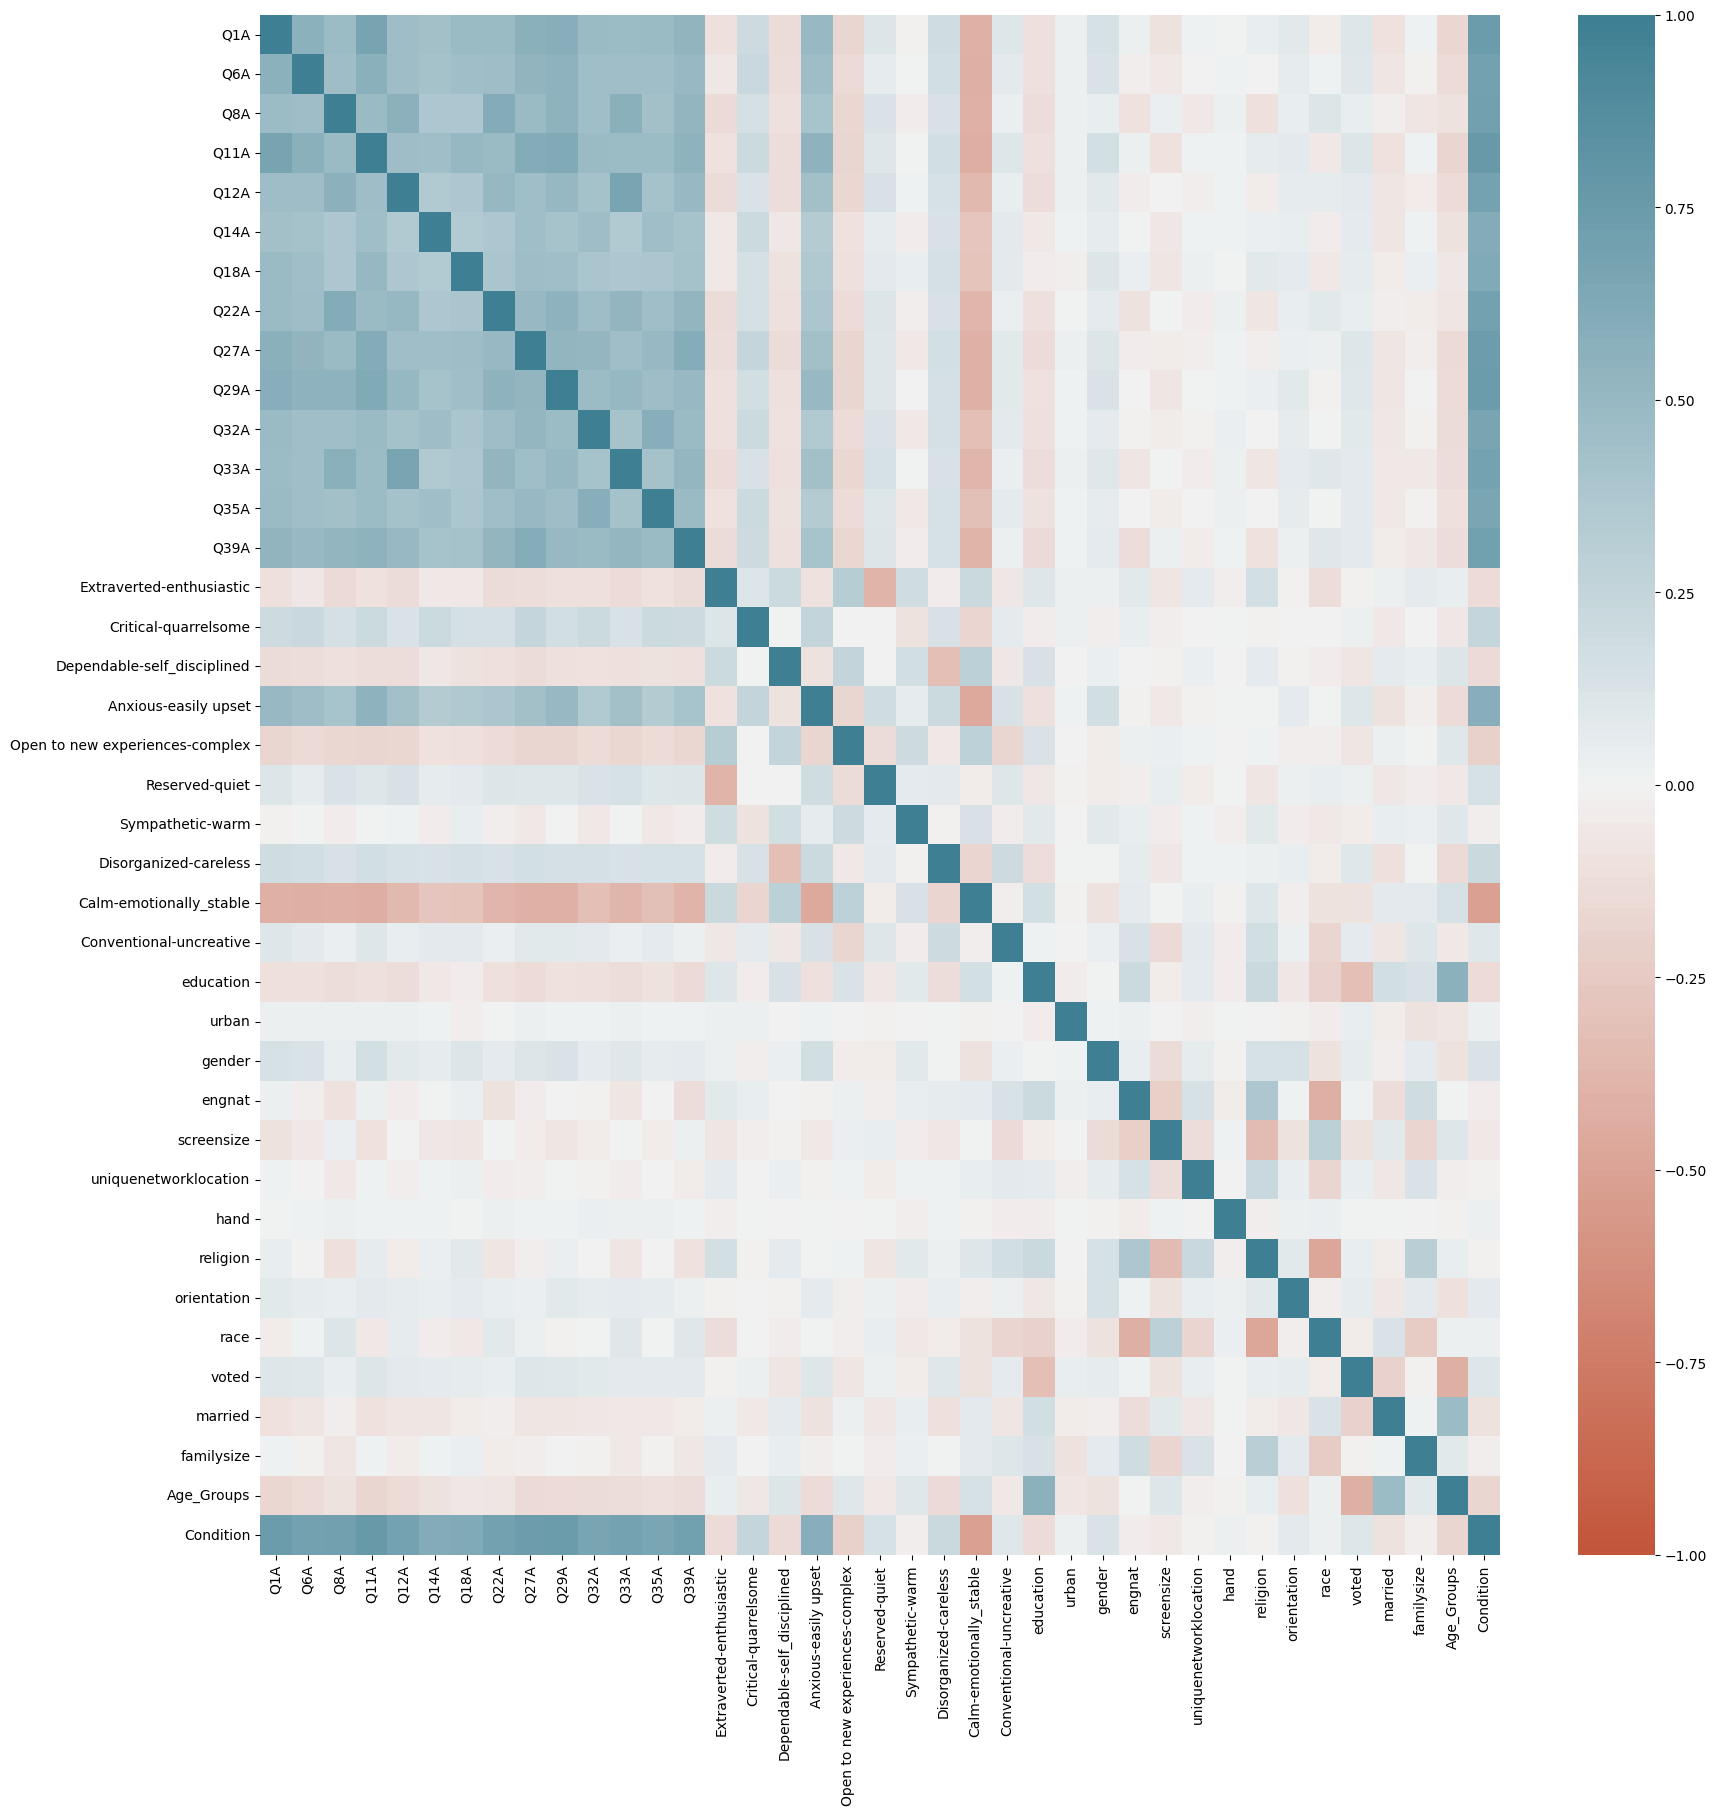

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(Str.corr(),vmin=-1,vmax=1,cmap=sns.diverging_palette(20,220,n=200))

# **DATASET ANSIEDAD**

In [ ]:
anxiety.head()

,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Q23A,Q25A,Q28A,Q30A,Q36A,Q40A,Q41A,Total_Count
0,3,3,3,1,3,2,2,3,3,2,1,3,2,3,34
1,0,2,2,2,2,0,0,0,1,3,2,2,0,1,17
2,0,0,0,1,3,1,0,1,1,0,1,3,1,0,12
3,2,0,3,2,1,0,1,0,0,0,2,0,3,3,17
4,1,3,3,3,3,3,3,3,3,3,3,3,3,3,40


In [ ]:
Anxiety=pd.merge(anxiety,new_data,how='inner',left_index=True,right_index=True)
Anxiety.head()

,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Q23A,Q25A,Q28A,...,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major,Age_Groups
0,3,3,3,1,3,2,2,3,3,2,...,1,1,12,1,10,2,1,2,No Degree,Primary Children
1,0,2,2,2,2,0,0,0,1,3,...,1,2,7,3,70,2,1,4,No Degree,Primary Children
2,0,0,0,1,3,1,0,1,1,0,...,1,1,4,3,60,1,1,3,No Degree,Secondary Children
3,2,0,3,2,1,0,1,0,0,0,...,1,2,4,5,70,2,1,5,Biology,Primary Children
4,1,3,3,3,3,3,3,3,3,3,...,2,3,10,1,10,2,1,4,Psychology,Secondary Children


In [ ]:
def condition(x):
    if x<=7:
        return 'Normal'
    if  8<=x<=9:
        return 'Mild'
    if 10<=x<=14:
        return 'Moderate'
    if 15<=x<=19:
        return 'Severe'
    if x>19:
        return 'Extremely Severe'

Anxiety['Condition']=Anxiety['Total_Count'].apply(condition)
Anxiety.head()

,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Q23A,Q25A,Q28A,...,hand,religion,orientation,race,voted,married,familysize,major,Age_Groups,Condition
0,3,3,3,1,3,2,2,3,3,2,...,1,12,1,10,2,1,2,No Degree,Primary Children,Extremely Severe
1,0,2,2,2,2,0,0,0,1,3,...,2,7,3,70,2,1,4,No Degree,Primary Children,Severe
2,0,0,0,1,3,1,0,1,1,0,...,1,4,3,60,1,1,3,No Degree,Secondary Children,Moderate
3,2,0,3,2,1,0,1,0,0,0,...,2,4,5,70,2,1,5,Biology,Primary Children,Severe
4,1,3,3,3,3,3,3,3,3,3,...,3,10,1,10,2,1,4,Psychology,Secondary Children,Extremely Severe


Text(0.5, 1.0, 'Condición de las personas para el nivel de ansiedad')

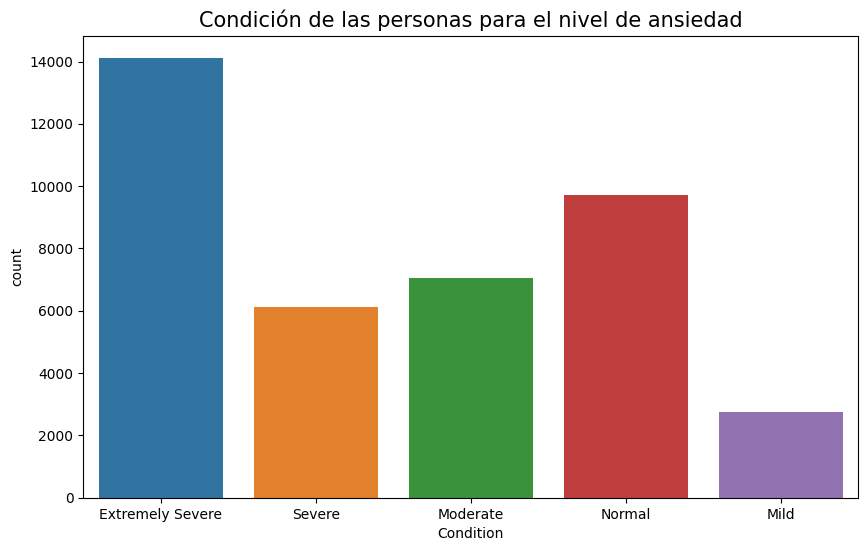

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=Anxiety, x='Condition')
plt.title('Condición de las personas para el nivel de ansiedad',fontsize=15)

In [ ]:
Anx=Anxiety.copy()
def condition(x):
    if x<=9:
        return 0
    if  10<=x<=13:
        return 1
    if 14<=x<=20:
        return 2
    if 21<=x<=27:
        return 3
    if x>28:
        return 4

def cond(x):
    if x<=10:
        return 0
    if  10<=x<=16:
        return 1
    if 17<=x<=21:
        return 2
    if 21<=x<=35:
        return 3
    if 36<=x<=48:
        return 4
    if x>=49:
        return 5
Anx['Condition']=Anx['Total_Count'].apply(condition)
Anx['Age_Groups']=Anx['age'].apply(cond)
Anx=Anx.drop(columns=['age','Total_Count'])
Anx.head()

,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Q23A,Q25A,Q28A,...,hand,religion,orientation,race,voted,married,familysize,major,Age_Groups,Condition
0,3,3,3,1,3,2,2,3,3,2,...,1,12,1,10,2,1,2,No Degree,1,4.0
1,0,2,2,2,2,0,0,0,1,3,...,2,7,3,70,2,1,4,No Degree,1,2.0
2,0,0,0,1,3,1,0,1,1,0,...,1,4,3,60,1,1,3,No Degree,2,1.0
3,2,0,3,2,1,0,1,0,0,0,...,2,4,5,70,2,1,5,Biology,1,2.0
4,1,3,3,3,3,3,3,3,3,3,...,3,10,1,10,2,1,4,Psychology,2,4.0


<ipython-input-34-af33d9df9c5a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Anx.corr(),vmin=-1,vmax=1,cmap=sns.diverging_palette(20,220,n=200))


<Axes: >

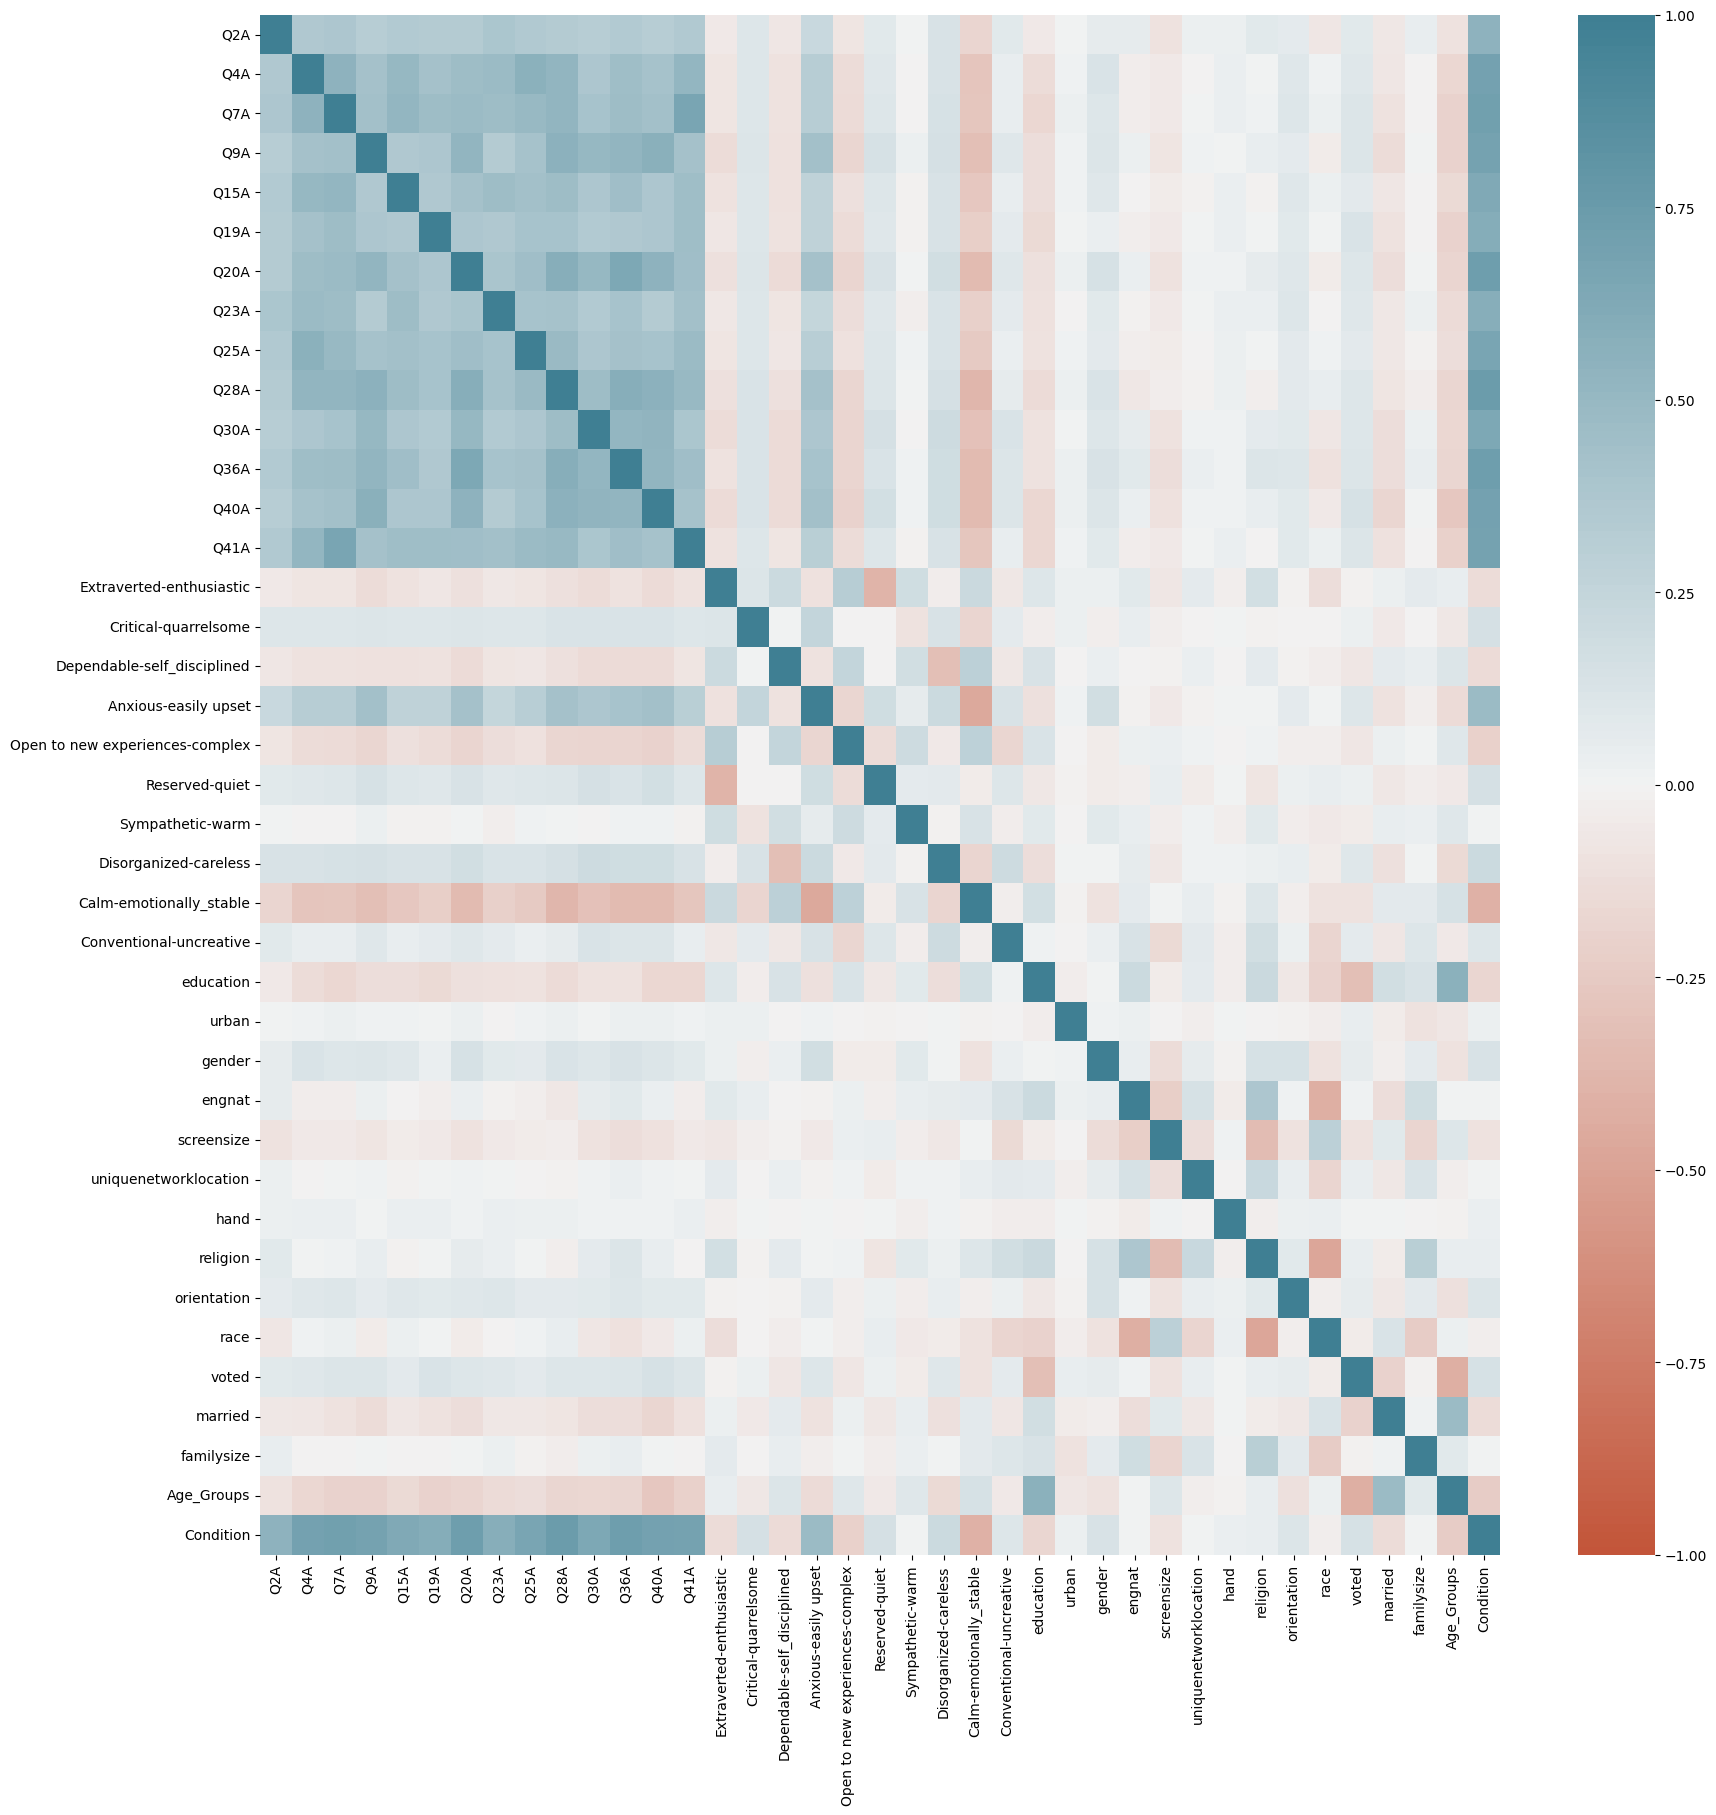

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(Anx.corr(),vmin=-1,vmax=1,cmap=sns.diverging_palette(20,220,n=200))

# **Comparar diferentes respuestas dadas para situaciones como género, matrimonio, educación, raza, etc. y compararlas con sus condiciones de ansiedad, depresión o estrés.**

# **Géneros**
1.   Hombre
2.   Mujer
3.   Otros

In [ ]:
print('Número de personas que participaron según el género\n',data_2['gender'].value_counts())

Número de personas que participaron según el género
 2    30366
1     8788
3      619
Name: gender, dtype: int64


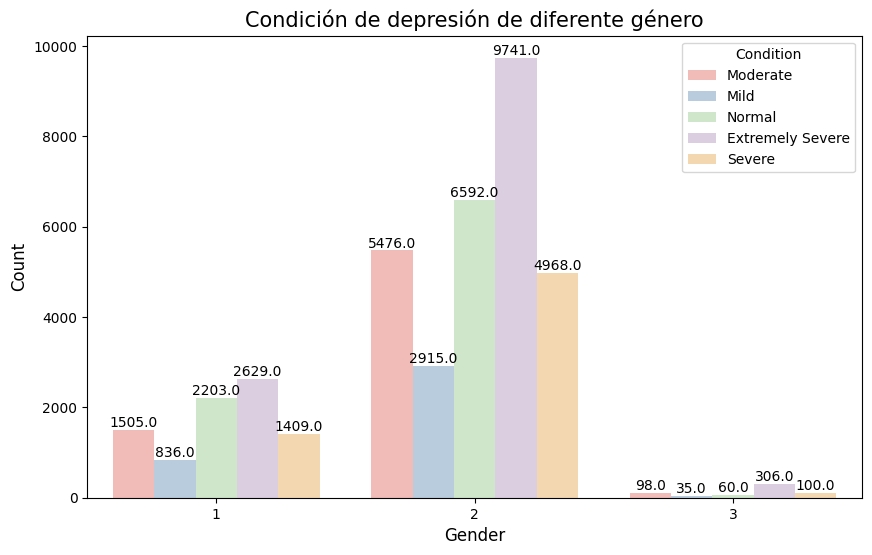

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
ax=sns.countplot(data=Depression.sort_values('gender'), x='gender', hue='Condition', palette='Pastel1')
plt.title('Condición de depresión de diferente género', fontsize=15)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

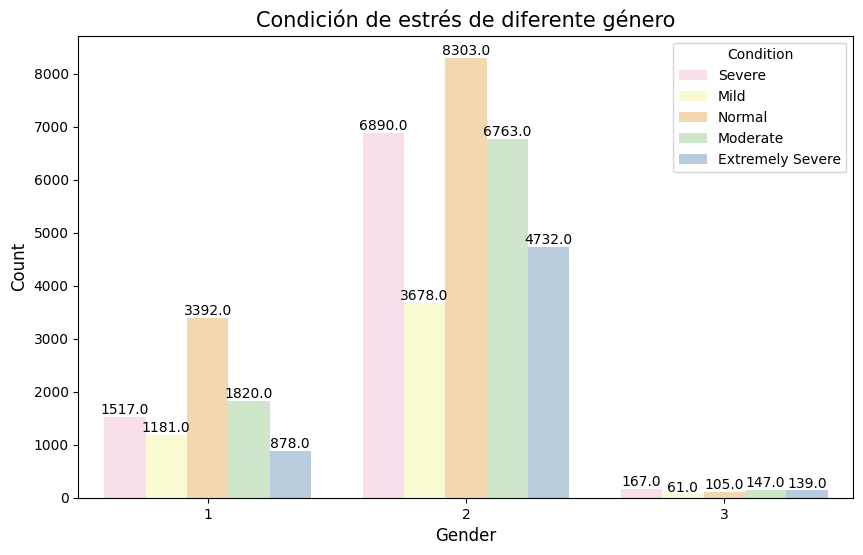

In [ ]:
plt.figure(figsize=(10, 6))
ax= sns.countplot(data=Stress.sort_values('gender'), x='gender', hue='Condition', palette='Pastel1_r')
plt.title('Condición de estrés de diferente género', fontsize=15)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
# Agregar etiquetas de datos numéricos en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

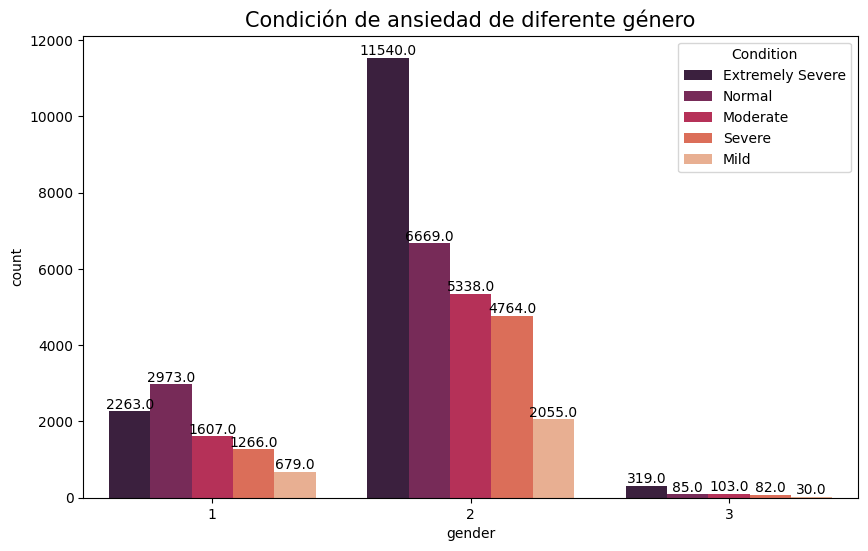

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.countplot(data=Anxiety.sort_values('gender'), x='gender', hue='Condition', palette='rocket')
plt.title('Condición de ansiedad de diferente género',fontsize=15)
# Agregar etiquetas de datos numéricos en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

# **Estado civil**
1.  Nunca casado
2.  Actualmente casado
3. Previamente casado

In [ ]:
Depression['married'].value_counts()

1    34130
2     4357
3     1286
Name: married, dtype: int64

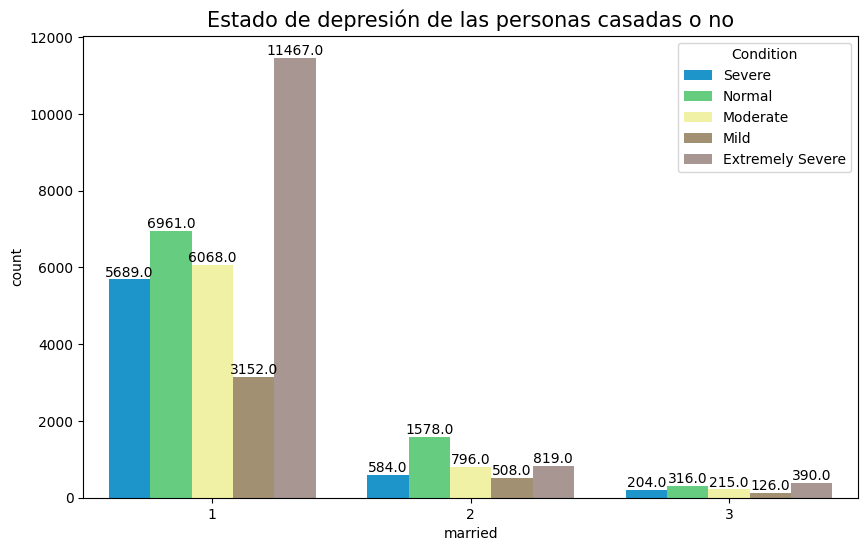

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.countplot(data=Depression.sort_values('married'), x='married',hue='Condition',palette='terrain')
plt.title('Estado de depresión de las personas casadas o no',fontsize=15)
# Agregar etiquetas de datos numéricos en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

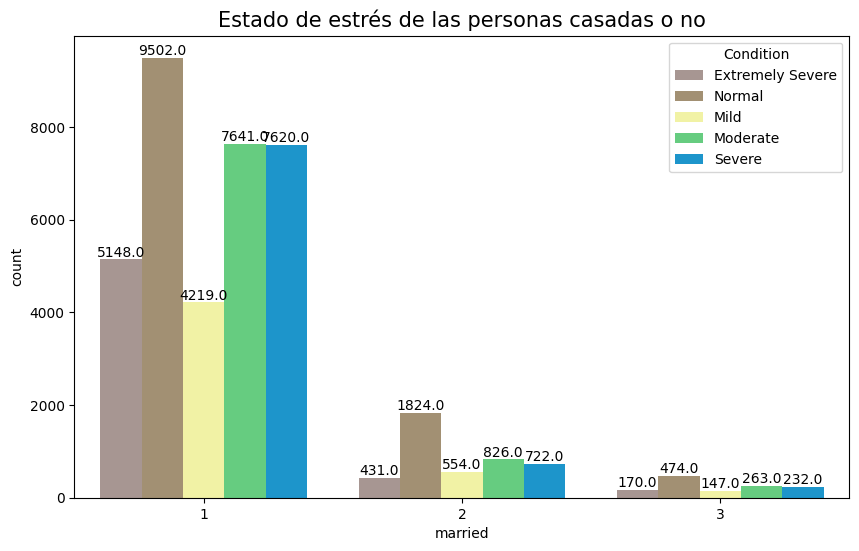

In [ ]:
plt.figure(figsize=(10,6))
ax= sns.countplot(data=Stress.sort_values('married'), x='married', hue='Condition', palette='terrain_r')
plt.title('Estado de estrés de las personas casadas o no',fontsize=15)
# Agregar etiquetas de datos numéricos en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Mostrar el gráfico
plt.show()

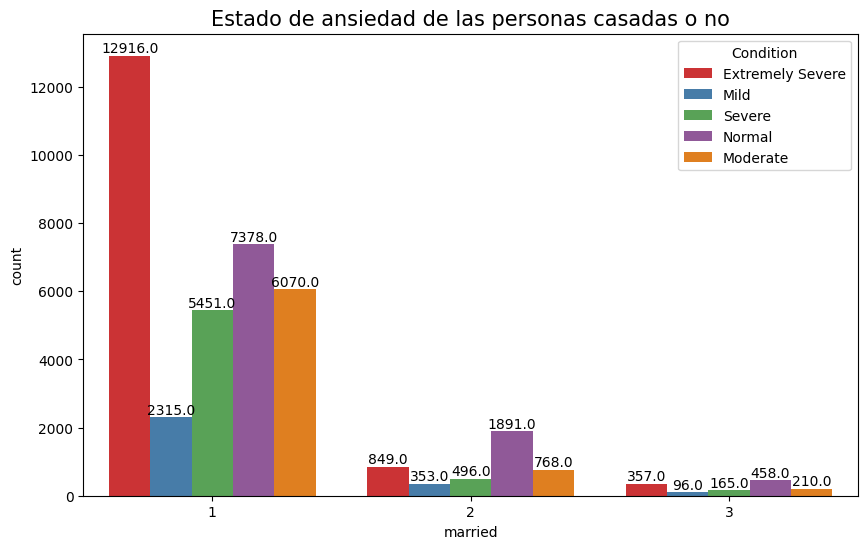

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.countplot(data=Anxiety.sort_values('married'), x='married',hue='Condition',palette='Set1')
plt.title('Estado de ansiedad de las personas casadas o no',fontsize=15)
# Agregar etiquetas de datos numéricos en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Mostrar el gráfico
plt.show()


# **Religiones**
1. agnóstico
2. ateo
3. budista
4. cristiano (católico)
5. cristiano (mormón)
6. cristiano (protestante)
7. Cristiano (Otro)
8. hindú
9. judío
10. musulmán
11. sij
12. Otro

In [ ]:
data_2['religion'].value_counts(ascending=True)

11       64
5       122
9       144
8       700
3       882
6      1544
12     1804
7      2254
4      3097
1      3244
2      3845
10    22073
Name: religion, dtype: int64

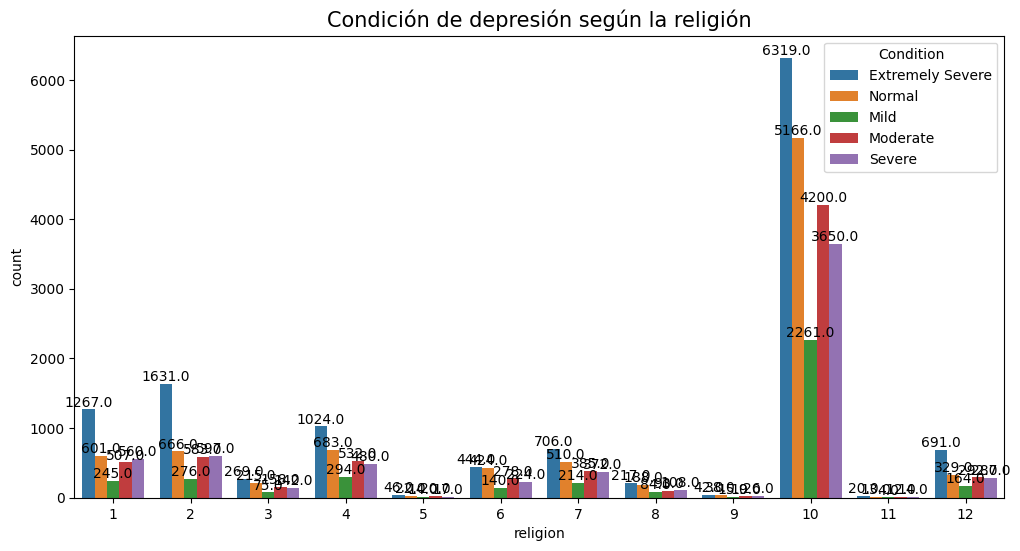

In [ ]:
plt.figure(figsize=(12,6))
a=sns.countplot(data= Depression.sort_values('religion'), x='religion', hue='Condition')
plt.title('Condición de depresión según la religión',fontsize=15)
# Agregar etiquetas de datos numéricos en las barras
for p in a.patches:
    a.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Mostrar el gráfico
plt.show()


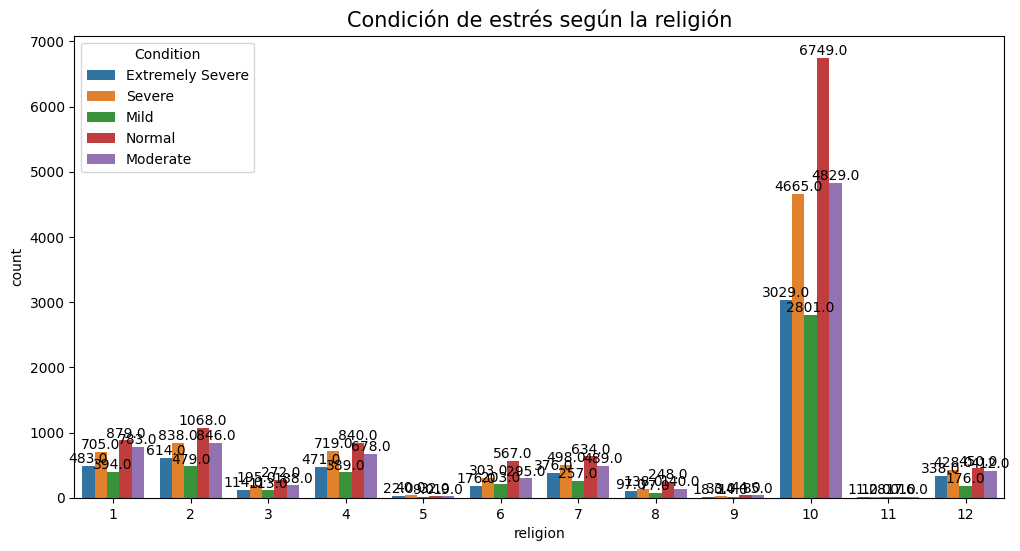

In [ ]:
plt.figure(figsize=(12,6))
ax=sns.countplot(data=Stress.sort_values('religion'), x='religion',hue=Stress['Condition'])
plt.title('Condición de estrés según la religión',fontsize=15)
# Agregar etiquetas de datos numéricos en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Mostrar el gráfico
plt.show()


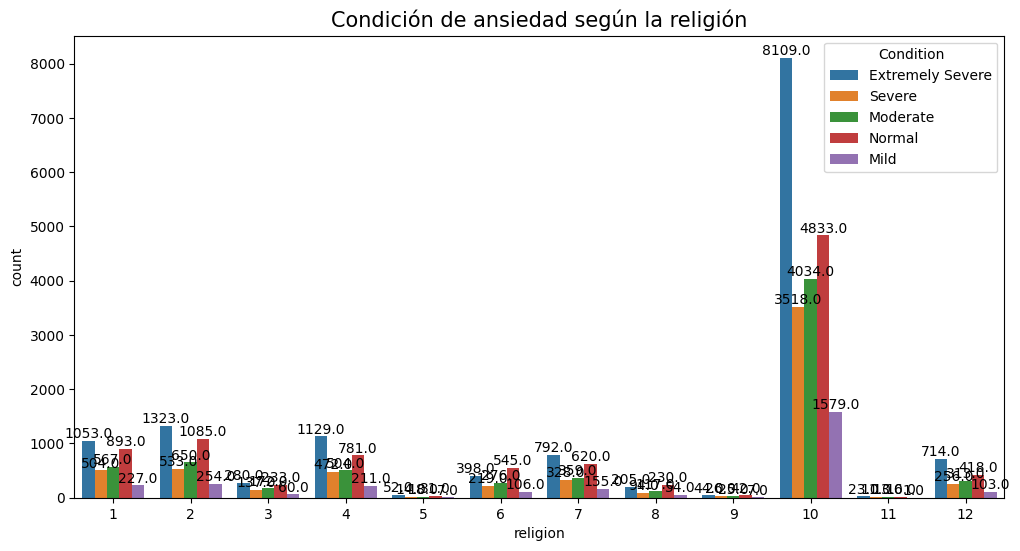

In [ ]:
plt.figure(figsize=(12,6))
ax=sns.countplot(data= Anxiety.sort_values('religion'), x='religion',hue=Anxiety['Condition'])
plt.title('Condición de ansiedad según la religión',fontsize=15)
# Agregar etiquetas de datos numéricos en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Mostrar el gráfico
plt.show()

# **Razas**
10. asiático (10)
20. árabe (20)
30. Negro (30)
40. Indígena australiano (40)
50. nativo americano (50)
60. Blanco (60)
10. Otro (70)

In [ ]:
print('Recuentos de respuestas registradas según carreras.\n',data_2['race'].value_counts())

Recuentos de respuestas registradas según carreras.
 10    23106
60    10657
70     4832
30      603
20      333
50      220
40       22
Name: race, dtype: int64


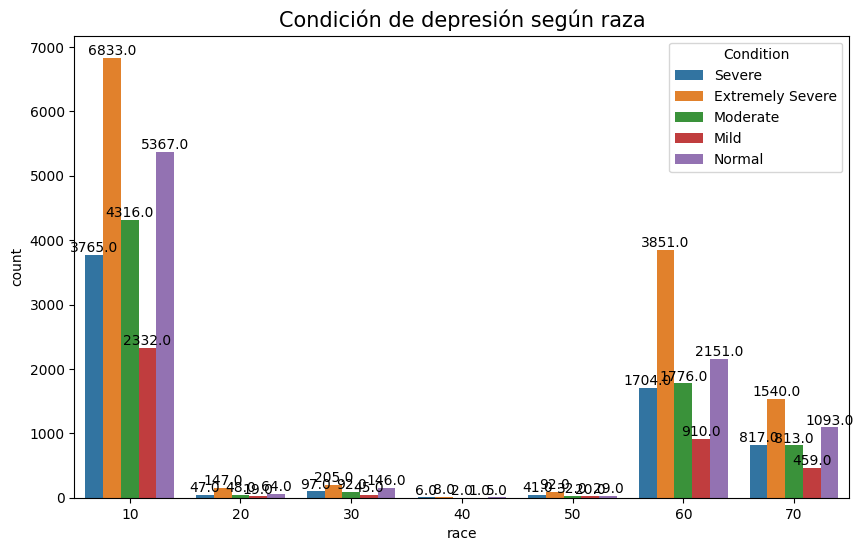

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.countplot(data=Depression.sort_values('race'), x='race',hue=Depression['Condition'])
plt.title('Condición de depresión según raza',fontsize=15)
# Agregar etiquetas de datos numéricos en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Mostrar el gráfico
plt.show()

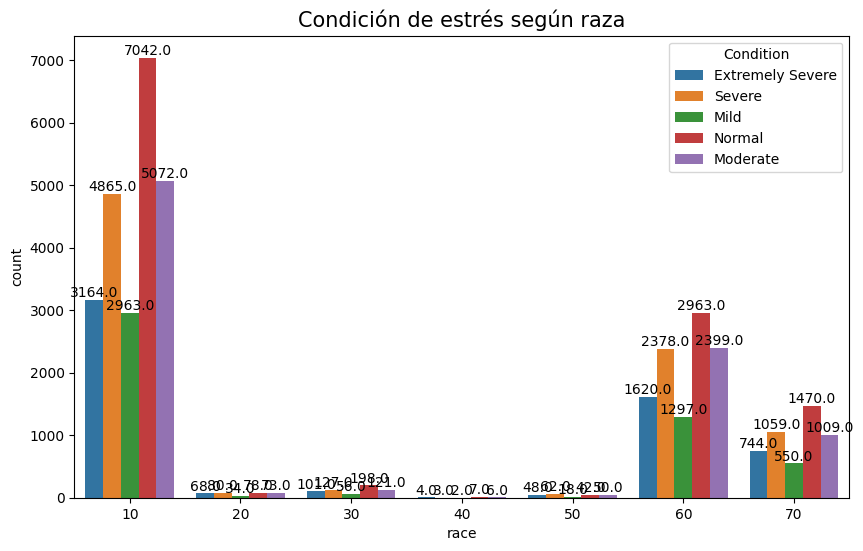

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.countplot(data=Stress.sort_values('race'), x='race',hue=Stress['Condition'])
plt.title('Condición de estrés según raza',fontsize=15)
# Agregar etiquetas de datos numéricos en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Mostrar el gráfico
plt.show()

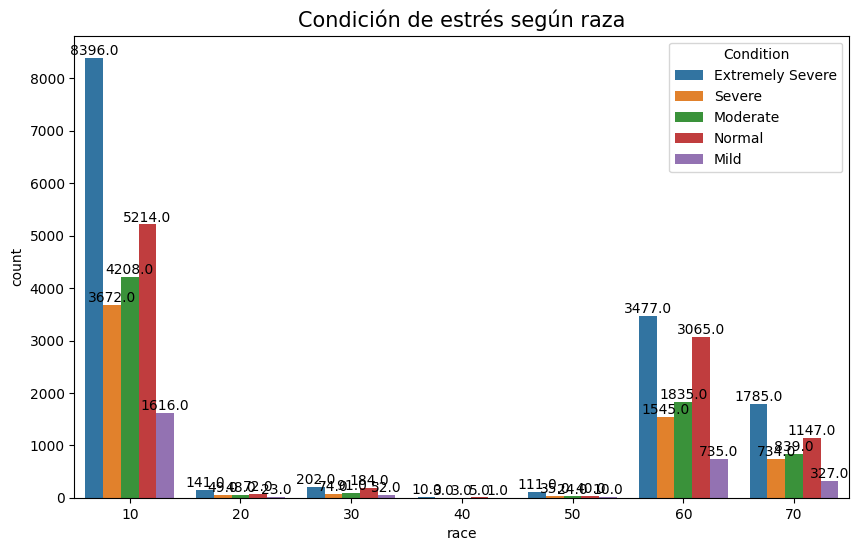

In [ ]:
plt.figure(figsize=(10,6))
qx=sns.countplot(data=Anxiety.sort_values('race'), x='race',hue=Anxiety['Condition'])
plt.title('Condición de estrés según raza',fontsize=15)
# Agregar etiquetas de datos numéricos en las barras
for p in qx.patches:
    qx.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Mostrar el gráfico
plt.show()


##**Orientación sexual**
1. heterosexual
2. Bisexuales
3. Homosexuales
4. Asexual
5. Otro

In [ ]:
print('Recuento de respuestas registradas según orientación sexual \n',data_2['orientation'].value_counts())

Recuento de respuestas registradas según orientación sexual 
 1    24269
3     5063
2     5005
5     3460
4     1976
Name: orientation, dtype: int64


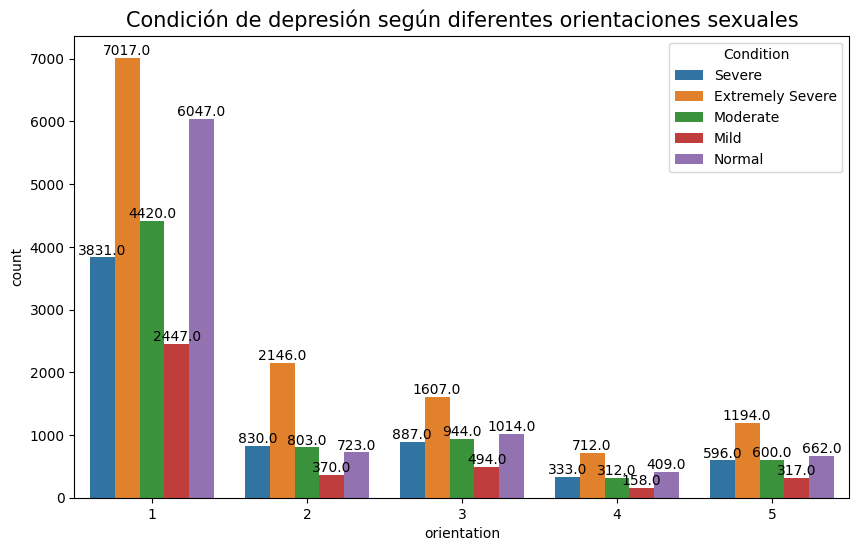

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.countplot(data=Depression.sort_values('orientation'), x='orientation',hue=Depression['Condition'])
plt.title('Condición de depresión según diferentes orientaciones sexuales',fontsize=15)
# Agregar etiquetas de datos numéricos en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Mostrar el gráfico
plt.show()

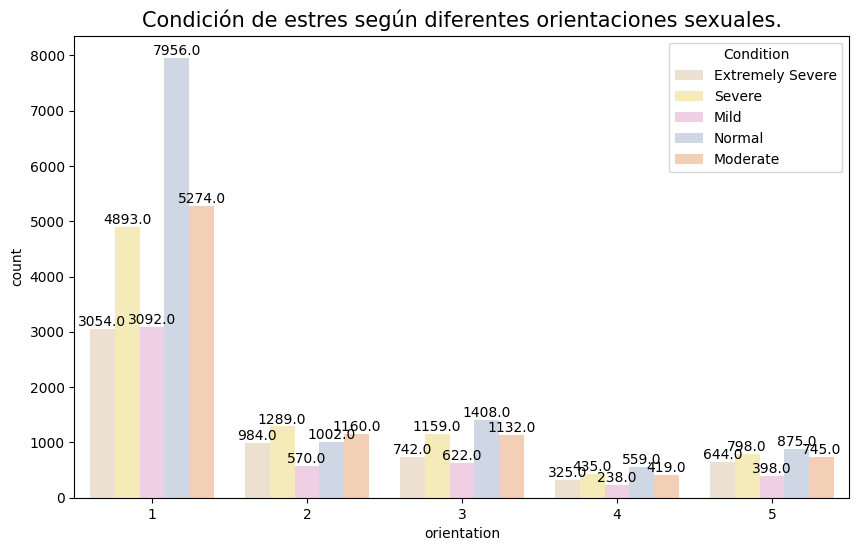

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.countplot(data=Stress.sort_values('orientation'), x='orientation',hue=Stress['Condition'],palette='Pastel2_r')
plt.title('Condición de estres según diferentes orientaciones sexuales.',fontsize=15)
# Agregar etiquetas de datos numéricos en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Mostrar el gráfico
plt.show()

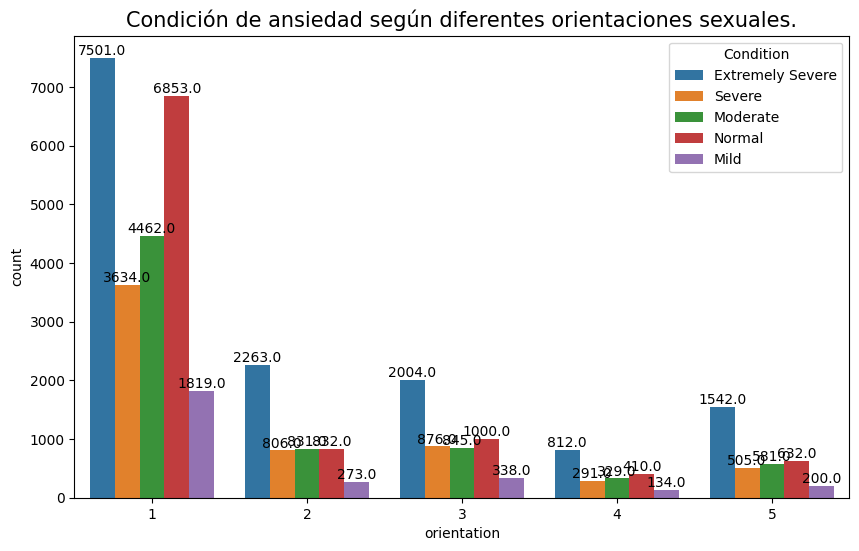

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.countplot(data=Anxiety.sort_values('orientation'), x='orientation',hue=Anxiety['Condition'])
plt.title('Condición de ansiedad según diferentes orientaciones sexuales.',fontsize=15)
# Agregar etiquetas de datos numéricos en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Mostrar el gráfico
plt.show()

## **Grupos de edad**
Donde
*   menores de 10 años
*   Primaria(10-16)
*   Secundaria(17-21)
*   Adultos(21-35)
*   Adultos mayores (36-48)
*   Personas mayores(49+)

In [ ]:
print('Recuento de respuestas registradas según grupos de edad\n',data_2['Age_Groups'].value_counts())

Recuento de respuestas registradas según grupos de edad
 Secondary Children    16188
Adults                15388
 Primary Children      4960
Elder Adults           2081
Older People           1156
Name: Age_Groups, dtype: int64


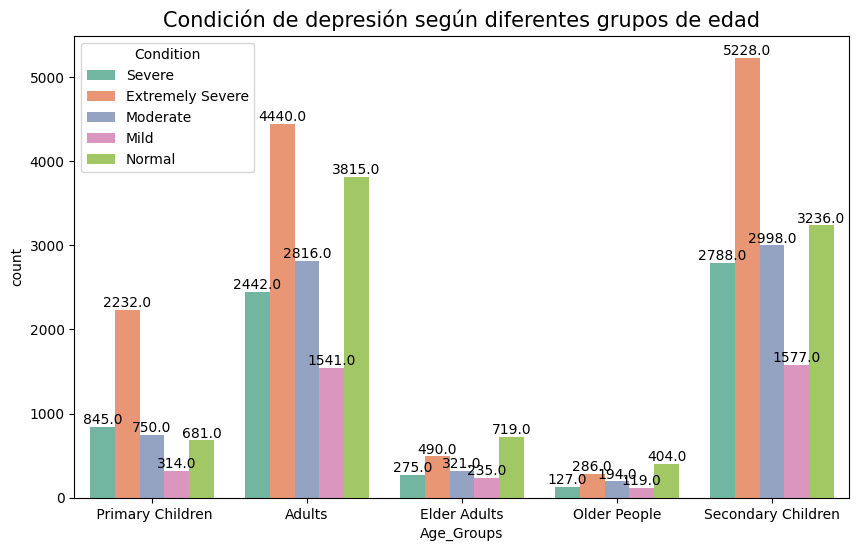

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.countplot(data=Depression.sort_values('Age_Groups'), x='Age_Groups',hue=Depression['Condition'],palette='Set2')
plt.title('Condición de depresión según diferentes grupos de edad',fontsize=15)
# Agregar etiquetas de datos numéricos en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Mostrar el gráfico
plt.show()

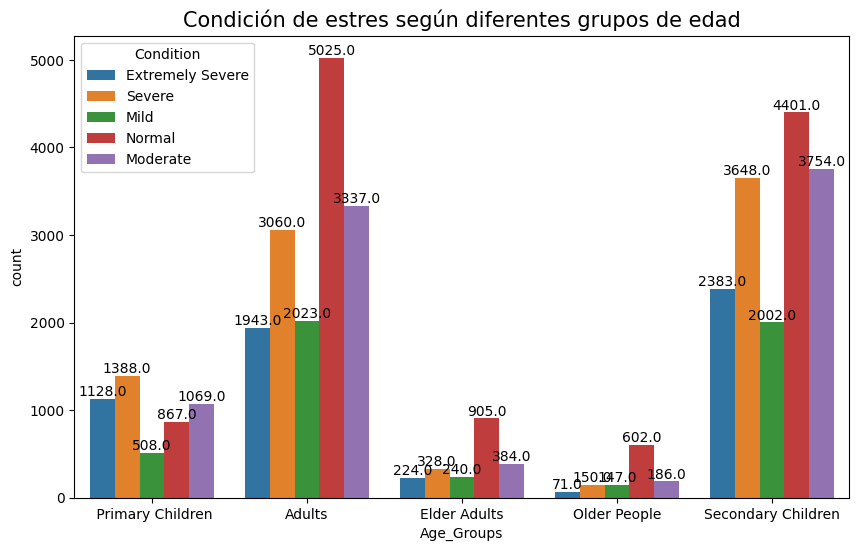

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.countplot(data=Stress.sort_values('Age_Groups'), x='Age_Groups',hue=Stress['Condition'])
plt.title('Condición de estres según diferentes grupos de edad',fontsize=15)
# Agregar etiquetas de datos numéricos en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Mostrar el gráfico
plt.show()

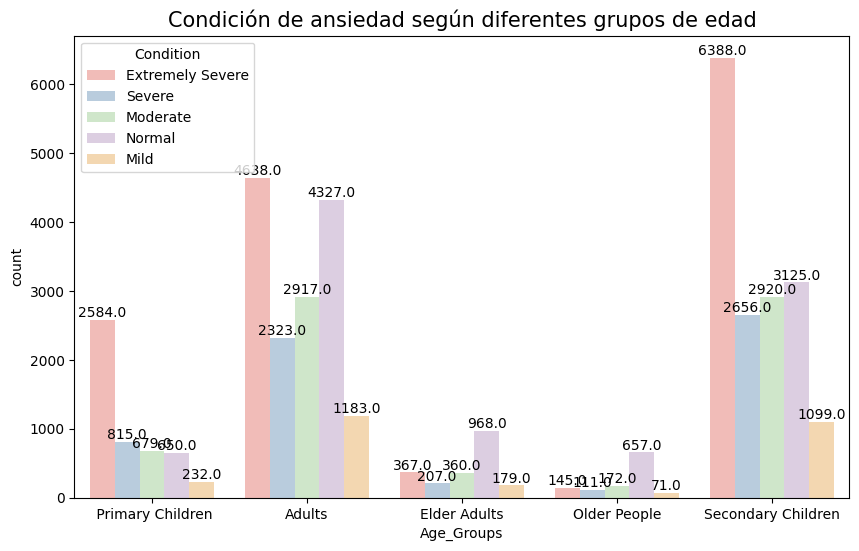

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.countplot(data=Anxiety.sort_values('Age_Groups'), x='Age_Groups',hue=Anxiety['Condition'],palette='Pastel1')
plt.title('Condición de ansiedad según diferentes grupos de edad',fontsize=15)
# Agregar etiquetas de datos numéricos en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Mostrar el gráfico
plt.show()

## **Nivel de Educación**
1. Menos que la escuela secundaria
2. Escuela secundaria
3. Título universitario
4. Título de posgrado

In [ ]:
print('Recuentos de respuestas registrados según la Educación \n',data_2['education'].value_counts())

Recuentos de respuestas registrados según la Educación 
 3    15634
2    15065
4     5008
1     4066
Name: education, dtype: int64


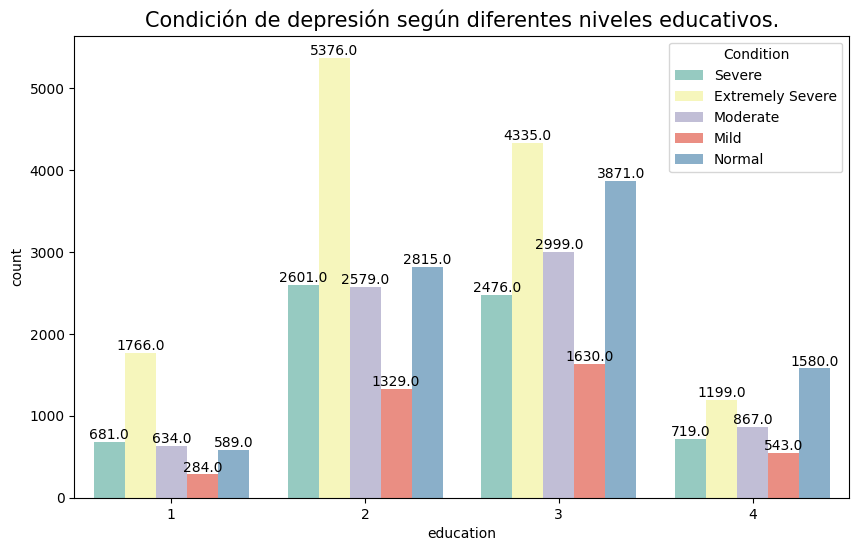

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.countplot(data=Depression.sort_values('education'), x='education',hue=Depression['Condition'],palette='Set3')
plt.title('Condición de depresión según diferentes niveles educativos.',fontsize=15)
# Agregar etiquetas de datos numéricos en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Mostrar el gráfico
plt.show()

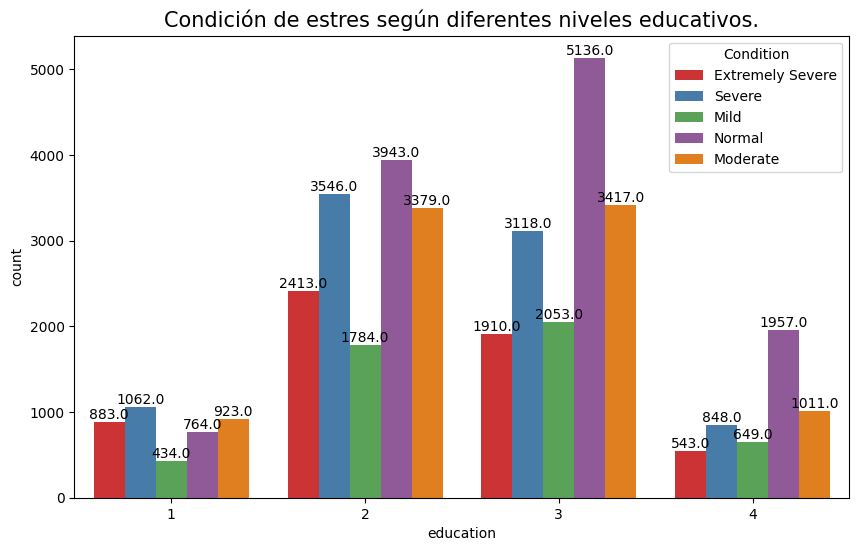

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.countplot(data=Stress.sort_values('education'), x='education',hue=Stress['Condition'],palette='Set1')
plt.title('Condición de estres según diferentes niveles educativos.',fontsize=15)
# Agregar etiquetas de datos numéricos en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Mostrar el gráfico
plt.show()

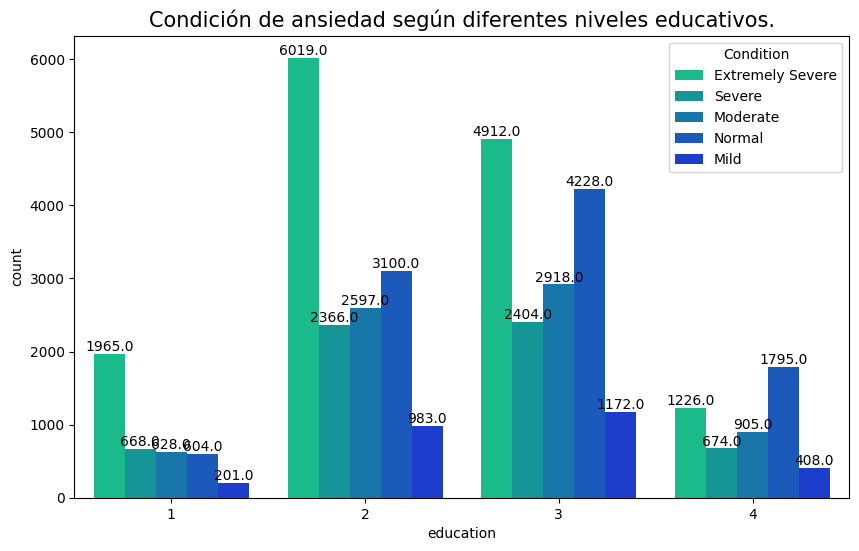

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.countplot(data=Anxiety.sort_values('education'), x='education',hue=Anxiety['Condition'],palette='winter_r')
plt.title('Condición de ansiedad según diferentes niveles educativos.',fontsize=15)
# Agregar etiquetas de datos numéricos en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Mostrar el gráfico
plt.show()

In [ ]:
def change_var(x):
    if x=='Primary Children':
        return 0
    elif x=='Secondary Children':
        return 1
    elif x=='Adults':
        return 2
    elif x=='Elder Adults':
        return 3
    elif x=='Older People':
        return 4
Depression['Age_Groups']=Depression['Age_Groups'].apply(change_var)
Stress['Age_Groups']=Stress['Age_Groups'].apply(change_var)
Anxiety['Age_Groups']=Anxiety['Age_Groups'].apply(change_var)

In [ ]:
Depression=Depression.dropna()
Stress=Stress.dropna()
Anxiety=Anxiety.dropna()

In [ ]:
Depression=Depression.drop(columns=['Total_Count','country','age'])
Stress=Stress.drop(columns=['Total_Count','country','age'])
Anxiety=Anxiety.drop(columns=['Total_Count','country','age'])

**Creación de modelos para predicciones.**

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,  f1_score, roc_auc_score, classification_report, mean_squared_error

# **Modelo de depresion**

In [ ]:
scaler=MinMaxScaler()
X=Depression[['Q3A', 'Q5A', 'Q10A', 'Q13A', 'Q16A', 'Q17A', 'Q21A', 'Q24A', 'Q26A',
       'Q31A', 'Q34A', 'Q37A', 'Q38A', 'Q42A',
       'Extraverted-enthusiastic', 'Critical-quarrelsome',
       'Dependable-self_disciplined', 'Anxious-easily upset',
        'Open to new experiences-complex', 'Reserved-quiet', 'Sympathetic-warm',
        'Disorganized-careless', 'Calm-emotionally_stable',
        'Conventional-uncreative', 'education', 'urban', 'gender', 'engnat',
        'screensize', 'uniquenetworklocation', 'hand', 'religion',
        'orientation', 'race', 'voted', 'married', 'familysize',
        'Age_Groups']]
y=Depression[['Condition']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
print('Training Set:',X_train.shape,y_train.shape)
print('Test Set:',X_test.shape,y_test.shape)

Training Set: (27240, 38) (27240, 1)
Test Set: (6811, 38) (6811, 1)


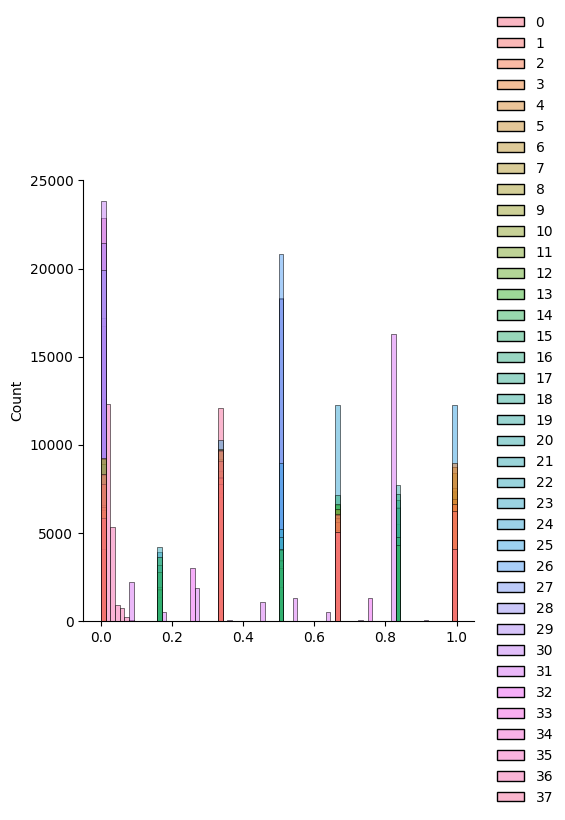

In [ ]:
sns.displot(X_train_scaled)

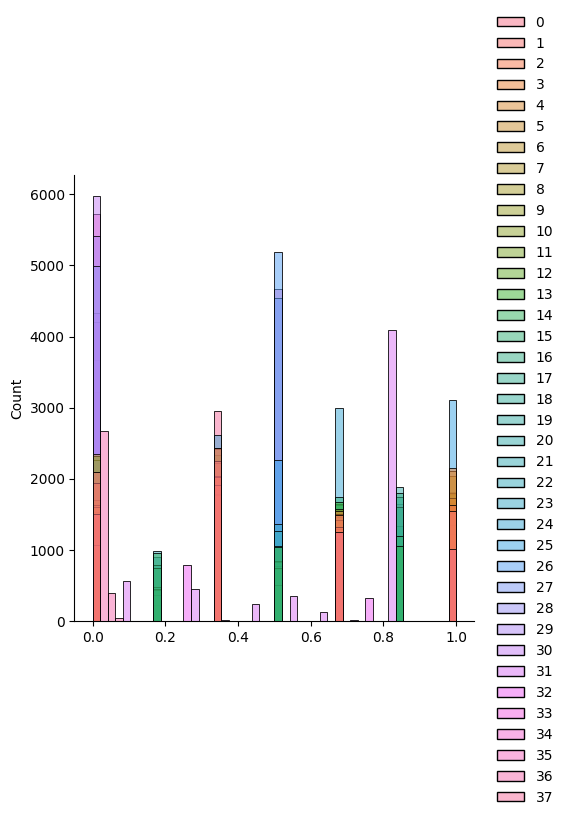

In [ ]:
sns.displot(X_test_scaled)

RandomForest

<ipython-input-79-5a00e7d64877>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RanFor=RandomForestClassifier(n_estimators=190,min_samples_split=3,min_samples_leaf=1,max_depth=160,max_features='sqrt').fit(X_train_scaled,y_train)


Accuracy: 0.93
F1_Score: 0.927
Recall_Score: 0.93
Precision_Score: 0.929


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

Cross Validation Score: 0.929
                  precision    recall  f1-score   support

Extremely Severe     0.9850    0.9874    0.9862      2059
            Mild     0.8856    0.6667    0.7607       720
        Moderate     0.8597    0.9198    0.8887      1259
          Normal     0.9365    0.9847    0.9600      1633
          Severe     0.9220    0.9228    0.9224      1140

        accuracy                         0.9295      6811
       macro avg     0.9178    0.8963    0.9036      6811
    weighted avg     0.9292    0.9295    0.9274      6811



Text(70.72222222222221, 0.5, 'True label')

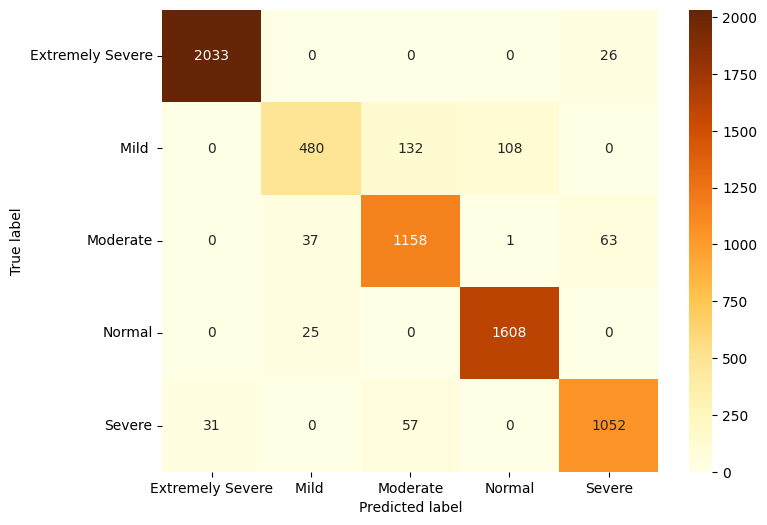

In [ ]:
RanFor=RandomForestClassifier(n_estimators=190,min_samples_split=3,min_samples_leaf=1,max_depth=160,max_features='sqrt').fit(X_train_scaled,y_train)
Acc_ran=round(accuracy_score(y_test,RanFor.predict(X_test_scaled)),3)
f1_ran=round(f1_score(y_test,RanFor.predict(X_test_scaled),average='weighted'),3)
recall_ran=round(recall_score(y_test,RanFor.predict(X_test_scaled),average='weighted'),3)
precision_ran=round(precision_score(y_test,RanFor.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',Acc_ran)
print('F1_Score:',f1_ran)
print('Recall_Score:',recall_ran)
print('Precision_Score:',precision_ran)
print('Cross Validation Score:',round(np.mean(cross_val_score(RanFor, X_train_scaled, y_train, cv = 6)),3))
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=RanFor.predict(X_test_scaled))
print(classification)
# Generate predictions with the best model
y_pred = RanFor.predict(X_test_scaled)
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap="YlOrBr", fmt='g',
            xticklabels=["Extremely Severe", "Mild ", "Moderate", "Normal", "Severe"],
            yticklabels=["Extremely Severe", "Mild ", "Moderate", "Normal", "Severe"])
plt.yticks(rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')

Decision Trees

Accuracy: 0.803
F1_Score: 0.803
Recall_Score: 0.803
Precision_Score: 0.805
Cross Validation Score: 0.793
                  precision    recall  f1-score   support

Extremely Severe     0.9240    0.9276    0.9258      2059
            Mild     0.5496    0.6153    0.5806       720
        Moderate     0.7008    0.7014    0.7011      1259
          Normal     0.9139    0.9032    0.9085      1633
          Severe     0.7096    0.6623    0.6851      1140

        accuracy                         0.8025      6811
       macro avg     0.7596    0.7620    0.7602      6811
    weighted avg     0.8049    0.8025    0.8034      6811



Text(70.72222222222221, 0.5, 'True label')

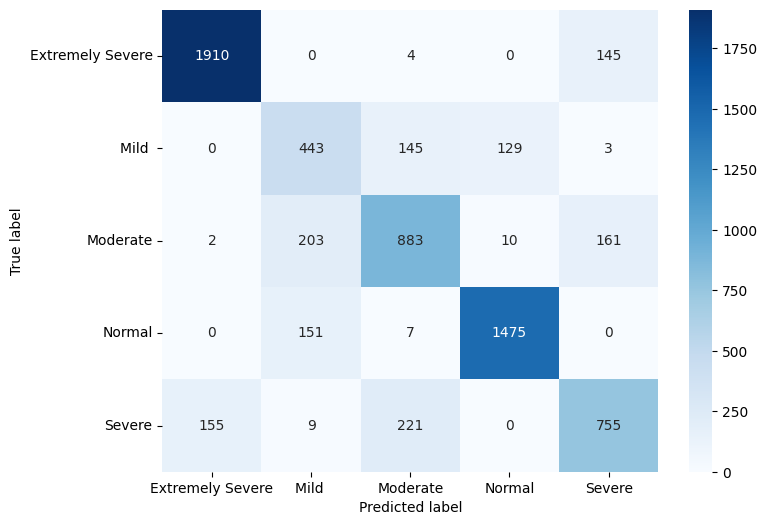

In [ ]:
DT=DecisionTreeClassifier(criterion='entropy',splitter='best',min_samples_split=9,min_samples_leaf=2,max_depth=100).fit(X_train_scaled,y_train)
Acc_dt=round(accuracy_score(y_test,DT.predict(X_test_scaled)),3)
f1_dt=round(f1_score(y_test,DT.predict(X_test_scaled),average='weighted'),3)
recall_dt=round(recall_score(y_test,DT.predict(X_test_scaled),average='weighted'),3)
precision_dt=round(precision_score(y_test,DT.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',Acc_dt)
print('F1_Score:',f1_dt)
print('Recall_Score:',recall_dt)
print('Precision_Score:',precision_dt)
print('Cross Validation Score:',round(np.mean(cross_val_score(DT, X_train_scaled, y_train, cv = 6)),3))
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=DT.predict(X_test_scaled))
print(classification)
# Generate predictions with the best model
y_pred = DT.predict(X_test_scaled)
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt='g',
            xticklabels=["Extremely Severe", "Mild ", "Moderate", "Normal", "Severe"],
            yticklabels=["Extremely Severe", "Mild ", "Moderate", "Normal", "Severe"])
plt.yticks(rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')

Support Vector Machines (SVM)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 1.0
F1_Score: 1.0
Recall_Score: 1.0
Precision_Score: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Cross Validation Score: 1.0
                  precision    recall  f1-score   support

Extremely Severe     1.0000    1.0000    1.0000      2059
            Mild     1.0000    1.0000    1.0000       720
        Moderate     1.0000    1.0000    1.0000      1259
          Normal     1.0000    1.0000    1.0000      1633
          Severe     1.0000    1.0000    1.0000      1140

        accuracy                         1.0000      6811
       macro avg     1.0000    1.0000    1.0000      6811
    weighted avg     1.0000    1.0000    1.0000      6811



Text(70.72222222222221, 0.5, 'True label')

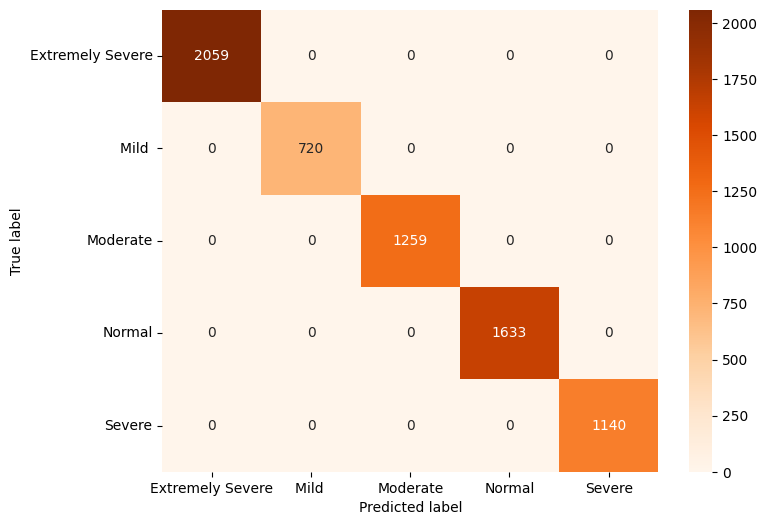

In [ ]:
svm=SVC(C=100,gamma=0.1,kernel='rbf').fit(X_train_scaled,y_train)
Acc_svm=round(accuracy_score(y_test,svm.predict(X_test_scaled)),3)
f1_svm=round(f1_score(y_test,svm.predict(X_test_scaled),average='weighted'),3)
recall_svm=round(recall_score(y_test,svm.predict(X_test_scaled),average='weighted'),3)
precision_svm=round(precision_score(y_test,svm.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',Acc_svm)
print('F1_Score:',f1_svm)
print('Recall_Score:',recall_svm)
print('Precision_Score:',precision_svm)
print('Cross Validation Score:',round(np.mean(cross_val_score(svm, X_train_scaled, y_train, cv = 6)),3))
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=svm.predict(X_test_scaled))
print(classification)
# Generate predictions with the best model
y_pred = svm.predict(X_test_scaled)
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap="Oranges", fmt='g',
            xticklabels=["Extremely Severe", "Mild ", "Moderate", "Normal", "Severe"],
            yticklabels=["Extremely Severe", "Mild ", "Moderate", "Normal", "Severe"])
plt.yticks(rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')

XGBoost

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [02:12:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split", "splitter" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Accuracy: 0.94
F1_Score: 0.939
Recall_Score: 0.94
Precision_Score: 0.939


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [02:12:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split", "splitter" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [02:12:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split", "splitter" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [02:12:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split", "splitter" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [02:12:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split", "splitter" } are not used.

  warni

Cross Validation Score: 0.94
              precision    recall  f1-score   support

           0     0.9912    0.9893    0.9902      3644
           1     0.8701    0.7912    0.8288      1245
           2     0.8830    0.9133    0.8979      2215
           3     0.9589    0.9766    0.9677      2865
           4     0.9227    0.9184    0.9205      1949

    accuracy                         0.9398     11918
   macro avg     0.9252    0.9178    0.9210     11918
weighted avg     0.9395    0.9398    0.9394     11918



Text(70.72222222222221, 0.5, 'True label')

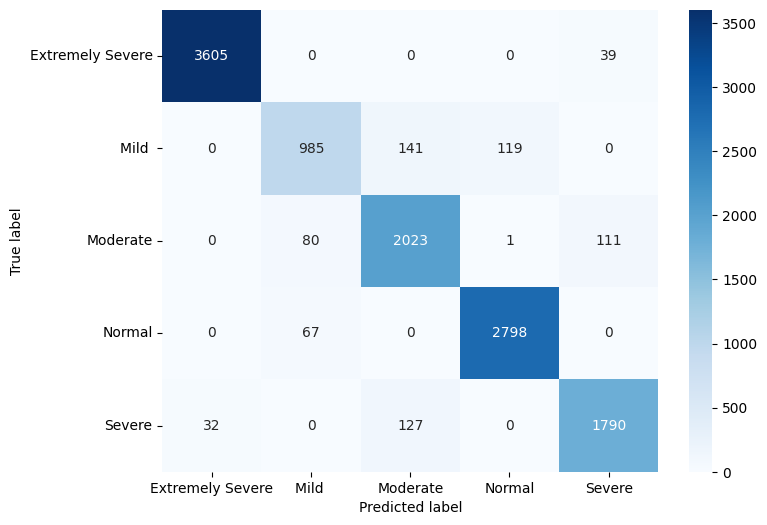

In [ ]:
# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform the training labels
y_train_encoded = label_encoder.fit_transform(y_train)

xgb_model=XGBClassifier(criterion='entropy',splitter='best',min_samples_split=9,min_samples_leaf=2,max_depth=100).fit(X_train_scaled,y_train_encoded)

y_test_encoded = label_encoder.transform(y_test)
Acc_xgb=round(accuracy_score(y_test_encoded,xgb_model.predict(X_test_scaled)),3)
f1_xgb=round(f1_score(y_test_encoded,xgb_model.predict(X_test_scaled),average='weighted'),3)
recall_xgb=round(recall_score(y_test_encoded,xgb_model.predict(X_test_scaled),average='weighted'),3)
precision_xgb=round(precision_score(y_test_encoded,xgb_model.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',Acc_xgb)
print('F1_Score:',f1_xgb)
print('Recall_Score:',recall_xgb)
print('Precision_Score:',precision_xgb)
print('Cross Validation Score:',round(np.mean(cross_val_score(xgb_model, X_train_scaled, y_train_encoded, cv = 6)),3))
classification=classification_report(
    digits=4,
    y_true=y_test_encoded,
    y_pred=xgb_model.predict(X_test_scaled))
print(classification)
# Generate predictions with the best model
y_pred = xgb_model.predict(X_test_scaled)
# Create the confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt='g',
            xticklabels=["Extremely Severe", "Mild ", "Moderate", "Normal", "Severe"],
            yticklabels=["Extremely Severe", "Mild ", "Moderate", "Normal", "Severe"])
plt.yticks(rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')

# **Resultados**

In [ ]:
Result={
                  'Model':['Random-Forest','Decision-Tree','SVM','XGBoost'],
                  'Accuracy(%)':[Acc_ran*100,Acc_dt*100,Acc_svm*100,Acc_xgb*100],
                  'F1_Score(%)':[f1_ran*100,f1_dt*100,f1_svm*100,f1_xgb*100],
                  'Precision(%)':[precision_ran*100,precision_dt*100,precision_svm*100,precision_xgb*100],
                  'Recall(%)':[recall_ran*100,recall_dt*100,recall_svm*100,recall_xgb*100],
                    }
Result_Depression=pd.DataFrame(Result)

# **Modelo para el estrés**

In [ ]:
Stress.columns

Index(['Q1A', 'Q6A', 'Q8A', 'Q11A', 'Q12A', 'Q14A', 'Q18A', 'Q22A', 'Q27A',
       'Q29A', 'Q32A', 'Q33A', 'Q35A', 'Q39A', 'Extraverted-enthusiastic',
       'Critical-quarrelsome', 'Dependable-self_disciplined',
       'Anxious-easily upset', 'Open to new experiences-complex',
       'Reserved-quiet', 'Sympathetic-warm', 'Disorganized-careless',
       'Calm-emotionally_stable', 'Conventional-uncreative', 'education',
       'urban', 'gender', 'engnat', 'screensize', 'uniquenetworklocation',
       'hand', 'religion', 'orientation', 'race', 'voted', 'married',
       'familysize', 'major', 'Age_Groups', 'Condition'],
      dtype='object')

In [ ]:
scaler=MinMaxScaler()
X=Stress[['Q1A', 'Q6A', 'Q8A', 'Q11A', 'Q12A', 'Q14A', 'Q18A', 'Q22A', 'Q27A',
       'Q29A', 'Q32A', 'Q33A', 'Q35A', 'Q39A',
       'Extraverted-enthusiastic', 'Critical-quarrelsome',
       'Dependable-self_disciplined', 'Anxious-easily upset',
        'Open to new experiences-complex', 'Reserved-quiet', 'Sympathetic-warm',
        'Disorganized-careless', 'Calm-emotionally_stable',
        'Conventional-uncreative', 'education', 'urban', 'gender', 'engnat',
        'screensize', 'uniquenetworklocation', 'hand', 'religion',
        'orientation', 'race', 'voted', 'married', 'familysize',
        'Age_Groups']]
y=Stress[['Condition']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
print('Training Set:',X_train.shape,y_train.shape)
print('Test Set:',X_test.shape,y_test.shape)

Training Set: (22628, 38) (22628, 1)
Test Set: (12185, 38) (12185, 1)


Random Forest

<ipython-input-75-7bc373e33261>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  ran=RandomForestClassifier().fit(X_train_scaled,y_train)


Accuracy: 0.885
F1_Score: 0.881
Recall_Score: 0.885
Precision_Score: 0.884


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

Cross Validation Score: 0.8823579119883759
                  precision    recall  f1-score   support

Extremely Severe     0.9730    0.8914    0.9304      1620
            Mild     0.8102    0.5747    0.6724      1552
        Moderate     0.8160    0.9071    0.8591      2713
          Normal     0.9312    0.9715    0.9509      3818
          Severe     0.8750    0.9170    0.8955      2482

        accuracy                         0.8849     12185
       macro avg     0.8811    0.8523    0.8617     12185
    weighted avg     0.8843    0.8849    0.8810     12185



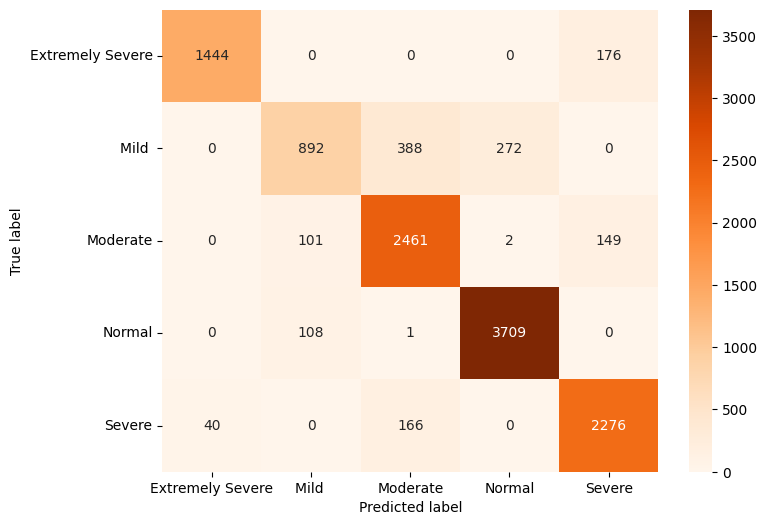

In [ ]:
ran=RandomForestClassifier().fit(X_train_scaled,y_train)
acc_ran=round(accuracy_score(y_test,ran.predict(X_test_scaled)),3)
F1_ran=round(f1_score(y_test,ran.predict(X_test_scaled),average='weighted'),3)
prec_ran=round(precision_score(y_test,ran.predict(X_test_scaled),average='weighted'),3)
rec_ran=round(recall_score(y_test,ran.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',acc_ran)
print('F1_Score:',F1_ran)
print('Recall_Score:',rec_ran)
print('Precision_Score:',prec_ran)
print('Cross Validation Score:',(np.mean(cross_val_score(ran, X_train_scaled, y_train, cv = 6))))
# Generate predictions with the best model
y_pred = ran.predict(X_test_scaled)
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap="Oranges", fmt='g',
            xticklabels=["Extremely Severe", "Mild ", "Moderate", "Normal", "Severe"],
            yticklabels=["Extremely Severe", "Mild ", "Moderate", "Normal", "Severe"])
plt.yticks(rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=ran.predict(X_test_scaled))
print(classification)

Decision Tree

Accuracy: 0.747
F1_Score: 0.749
Recall_Score: 0.747
Precision_Score: 0.751
Cross Validation Score: 0.7474811961464017
                  precision    recall  f1-score   support

Extremely Severe     0.8439    0.8241    0.8339      1620
            Mild     0.4994    0.5238    0.5113      1552
        Moderate     0.6602    0.6723    0.6662      2713
          Normal     0.9062    0.8756    0.8906      3818
          Severe     0.7091    0.7208    0.7149      2482

        accuracy                         0.7471     12185
       macro avg     0.7237    0.7233    0.7234     12185
    weighted avg     0.7512    0.7471    0.7490     12185



Text(70.72222222222221, 0.5, 'True label')

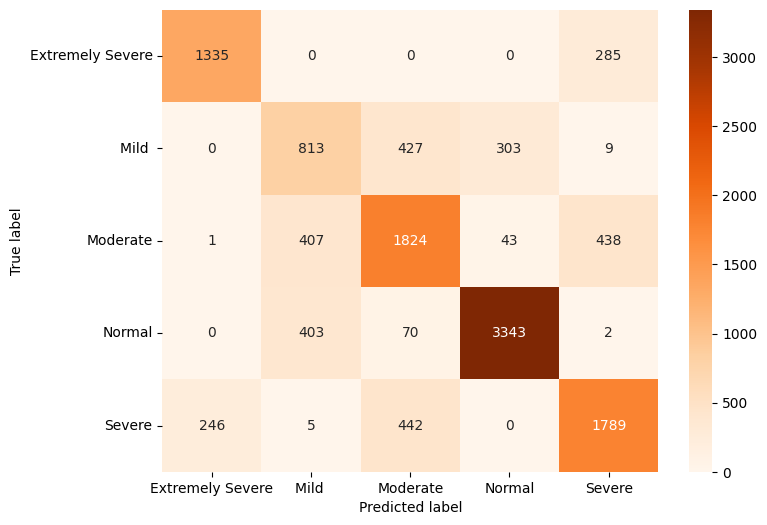

In [ ]:
dt=DecisionTreeClassifier(criterion= 'entropy',max_depth= 80, min_samples_leaf= 9, min_samples_split=9).fit(X_train_scaled,y_train)
acc_dt=round(accuracy_score(y_test,dt.predict(X_test_scaled)),3)
F1_dt=round(f1_score(y_test,dt.predict(X_test_scaled),average='weighted'),3)
prec_dt=round(precision_score(y_test,dt.predict(X_test_scaled),average='weighted'),3)
rec_dt=round(recall_score(y_test,dt.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',acc_dt)
print('F1_Score:',F1_dt)
print('Recall_Score:',rec_dt)
print('Precision_Score:',prec_dt)
print('Cross Validation Score:',(np.mean(cross_val_score(dt, X_train_scaled, y_train, cv = 6))))
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=dt.predict(X_test_scaled))
print(classification)
# Generate predictions with the best model
y_pred = dt.predict(X_test_scaled)
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap="Oranges", fmt='g',
            xticklabels=["Extremely Severe", "Mild ", "Moderate", "Normal", "Severe"],
            yticklabels=["Extremely Severe", "Mild ", "Moderate", "Normal", "Severe"])
plt.yticks(rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')

Support Vector Machines

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 1.0
F1_Score: 1.0
Recall_Score: 1.0
Precision_Score: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Cross Validation Score: 1.0
                  precision    recall  f1-score   support

Extremely Severe     1.0000    1.0000    1.0000      1620
            Mild     1.0000    1.0000    1.0000      1552
        Moderate     1.0000    1.0000    1.0000      2713
          Normal     1.0000    1.0000    1.0000      3818
          Severe     1.0000    1.0000    1.0000      2482

        accuracy                         1.0000     12185
       macro avg     1.0000    1.0000    1.0000     12185
    weighted avg     1.0000    1.0000    1.0000     12185



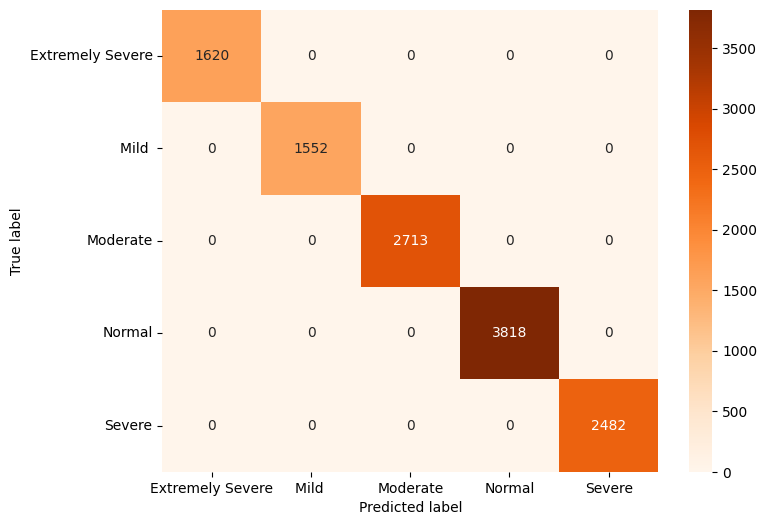

In [ ]:
Svm=SVC(C=10, gamma=0.01, kernel='sigmoid').fit(X_train_scaled,y_train)
acc_svm=round(accuracy_score(y_test,Svm.predict(X_test_scaled)),3)
F1_svm=round(f1_score(y_test,Svm.predict(X_test_scaled),average='weighted'),3)
prec_svm=round(precision_score(y_test,Svm.predict(X_test_scaled),average='weighted'),3)
rec_svm=round(recall_score(y_test,Svm.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',acc_svm)
print('F1_Score:',F1_svm)
print('Recall_Score:',rec_svm)
print('Precision_Score:',prec_svm)
print('Cross Validation Score:',(np.mean(cross_val_score(Svm, X_train_scaled, y_train, cv = 6))))
# Generate predictions with the best model
y_pred = Svm.predict(X_test_scaled)
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap="Oranges", fmt='g',
            xticklabels=["Extremely Severe", "Mild ", "Moderate", "Normal", "Severe"],
            yticklabels=["Extremely Severe", "Mild ", "Moderate", "Normal", "Severe"])
plt.yticks(rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=Svm.predict(X_test_scaled))
print(classification)

XGBoost

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [02:14:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split", "splitter" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Accuracy: 0.916
F1_Score: 0.915
Recall_Score: 0.916
Precision_Score: 0.915


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [02:14:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split", "splitter" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [02:14:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split", "splitter" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [02:15:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split", "splitter" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [02:15:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split", "splitter" } are not used.

  warni

Cross Validation Score: 0.912
              precision    recall  f1-score   support

           0     0.9722    0.9278    0.9495      1620
           1     0.8437    0.7371    0.7868      1552
           2     0.8684    0.9196    0.8933      2713
           3     0.9588    0.9699    0.9643      3818
           4     0.9074    0.9315    0.9193      2482

    accuracy                         0.9156     12185
   macro avg     0.9101    0.8972    0.9026     12185
weighted avg     0.9153    0.9156    0.9147     12185



Text(70.72222222222221, 0.5, 'True label')

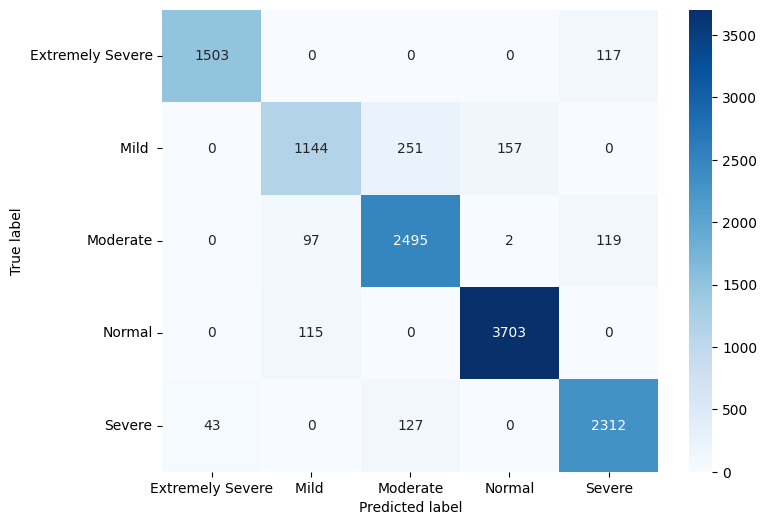

In [ ]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the training labels
y_train_encoded = label_encoder.fit_transform(y_train)

XGB_model=XGBClassifier(criterion='entropy',splitter='best',min_samples_split=9,min_samples_leaf=2,max_depth=100).fit(X_train_scaled,y_train_encoded)
y_test_encoded = label_encoder.transform(y_test)
acc_XGB=round(accuracy_score(y_test_encoded,XGB_model.predict(X_test_scaled)),3)
F1_XGB=round(f1_score(y_test_encoded,XGB_model.predict(X_test_scaled),average='weighted'),3)
rec_XGB=round(recall_score(y_test_encoded,XGB_model.predict(X_test_scaled),average='weighted'),3)
prec_XGB=round(precision_score(y_test_encoded,XGB_model.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',acc_XGB)
print('F1_Score:',F1_XGB)
print('Recall_Score:',rec_XGB)
print('Precision_Score:',prec_XGB)
print('Cross Validation Score:',round(np.mean(cross_val_score(XGB_model, X_train_scaled, y_train_encoded, cv = 6)),3))
classification=classification_report(
    digits=4,
    y_true=y_test_encoded,
    y_pred=XGB_model.predict(X_test_scaled))
print(classification)
# Generate predictions with the best model
y_pred = XGB_model.predict(X_test_scaled)
# Create the confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt='g',
            xticklabels=["Extremely Severe", "Mild ", "Moderate", "Normal", "Severe"],
            yticklabels=["Extremely Severe", "Mild ", "Moderate", "Normal", "Severe"])
plt.yticks(rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')

# **Resultados**

In [ ]:
Result_1={
                  'Model':['Random-Forest','Decision-Tree','SVM','XGBoost'],
                  'Accuracy(%)':[acc_ran*100,acc_dt*100,acc_svm*100, acc_XGB*100],
                  'F1_Score(%)':[F1_ran*100,F1_dt*100,F1_svm*100,F1_XGB*100],
                  'Precision(%)':[prec_ran*100,prec_dt*100,prec_svm*100,prec_XGB*100],
                  'Recall(%)':[rec_ran*100,rec_dt*100,rec_svm*100,rec_XGB*100]
                    }
Result_Stress=pd.DataFrame(Result_1)


# **Modelo para la ansiedad**

In [ ]:
Anxiety.columns

Index(['Q2A', 'Q4A', 'Q7A', 'Q9A', 'Q15A', 'Q19A', 'Q20A', 'Q23A', 'Q25A',
       'Q28A', 'Q30A', 'Q36A', 'Q40A', 'Q41A', 'Extraverted-enthusiastic',
       'Critical-quarrelsome', 'Dependable-self_disciplined',
       'Anxious-easily upset', 'Open to new experiences-complex',
       'Reserved-quiet', 'Sympathetic-warm', 'Disorganized-careless',
       'Calm-emotionally_stable', 'Conventional-uncreative', 'education',
       'urban', 'gender', 'engnat', 'screensize', 'uniquenetworklocation',
       'hand', 'religion', 'orientation', 'race', 'voted', 'married',
       'familysize', 'major', 'Age_Groups', 'Condition'],
      dtype='object')

In [ ]:
scaler=MinMaxScaler()
X=Anxiety[['Q2A', 'Q4A', 'Q7A', 'Q9A', 'Q15A', 'Q19A', 'Q20A', 'Q23A', 'Q25A',
       'Q28A', 'Q30A', 'Q36A', 'Q40A', 'Q41A',
       'Extraverted-enthusiastic', 'Critical-quarrelsome',
       'Dependable-self_disciplined', 'Anxious-easily upset',
        'Open to new experiences-complex', 'Reserved-quiet', 'Sympathetic-warm',
        'Disorganized-careless', 'Calm-emotionally_stable',
        'Conventional-uncreative', 'education', 'urban', 'gender', 'engnat',
        'screensize', 'uniquenetworklocation', 'hand', 'religion',
        'orientation', 'race', 'voted', 'married', 'familysize',
        'Age_Groups']]
y=Anxiety[['Condition']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
print('Training Set:',X_train.shape,y_train.shape)
print('Test Set:',X_test.shape,y_test.shape)

Training Set: (27850, 38) (27850, 1)
Test Set: (6963, 38) (6963, 1)


Random Forest

<ipython-input-85-c51742c55e6c>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rand=RandomForestClassifier(criterion='entropy').fit(X_train_scaled,y_train)


Accuracy: 0.846
F1_Score: 0.823
Recall_Score: 0.838
Precision_Score: 0.846


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

Cross Validation Score: 0.8477108726069793
                  precision    recall  f1-score   support

Extremely Severe     0.9329    0.9673    0.9498      4039
            Mild     0.6691    0.1007    0.1750       904
        Moderate     0.7093    0.8791    0.7851      2234
          Normal     0.8812    0.9871    0.9311      3185
          Severe     0.7920    0.6621    0.7212      1823

        accuracy                         0.8464     12185
       macro avg     0.7969    0.7193    0.7125     12185
    weighted avg     0.8377    0.8464    0.8231     12185



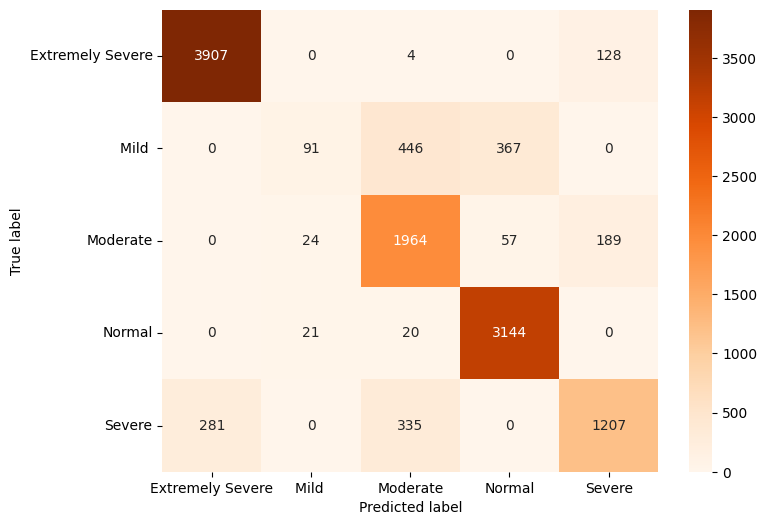

In [ ]:
rand=RandomForestClassifier(criterion='entropy').fit(X_train_scaled,y_train)
accu_ran=round(accuracy_score(y_test,rand.predict(X_test_scaled)),3)
f1_score_ran=round(f1_score(y_test,rand.predict(X_test_scaled),average='weighted'),3)
Precision_ran=round(precision_score(y_test,rand.predict(X_test_scaled),average='weighted'),3)
Recall_ran=round(recall_score(y_test,rand.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',accu_ran)
print('F1_Score:',f1_score_ran)
print('Recall_Score:',Precision_ran)
print('Precision_Score:',Recall_ran)
print('Cross Validation Score:',(np.mean(cross_val_score(rand, X_train_scaled, y_train, cv = 6))))
# Generate predictions with the best model
y_pred = rand.predict(X_test_scaled)
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap="Oranges", fmt='g',
            xticklabels=["Extremely Severe", "Mild ", "Moderate", "Normal", "Severe"],
            yticklabels=["Extremely Severe", "Mild ", "Moderate", "Normal", "Severe"])
plt.yticks(rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=rand.predict(X_test_scaled))
print(classification)

Decision Tree

Accuracy: 0.735
F1_Score: 0.734
Recall_Score: 0.732
Precision_Score: 0.735
Cross Validation Score: 0.7262241896657146
                  precision    recall  f1-score   support

Extremely Severe     0.8833    0.8898    0.8865      4039
            Mild     0.3478    0.3285    0.3379       904
        Moderate     0.5857    0.5967    0.5911      2234
          Normal     0.8806    0.8867    0.8836      3185
          Severe     0.5093    0.4970    0.5031      1823

        accuracy                         0.7348     12185
       macro avg     0.6413    0.6397    0.6404     12185
    weighted avg     0.7323    0.7348    0.7335     12185



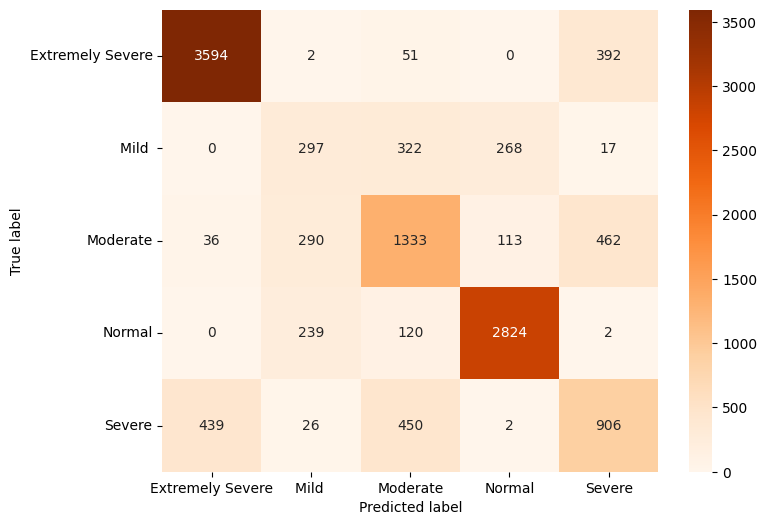

In [ ]:
Dt=DecisionTreeClassifier(criterion='entropy',max_depth=100,min_samples_leaf=9,min_samples_split=3).fit(X_train_scaled,y_train)
accu_dt=round(accuracy_score(y_test,Dt.predict(X_test_scaled)),3)
f1_score_dt=round(f1_score(y_test,Dt.predict(X_test_scaled),average='weighted'),3)
Precision_dt=round(precision_score(y_test,Dt.predict(X_test_scaled),average='weighted'),3)
Recall_dt=round(recall_score(y_test,Dt.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',accu_dt)
print('F1_Score:',f1_score_dt)
print('Recall_Score:',Precision_dt)
print('Precision_Score:',Recall_dt)
print('Cross Validation Score:',(np.mean(cross_val_score(Dt, X_train_scaled, y_train, cv = 6))))
# Generate predictions with the best model
y_pred = Dt.predict(X_test_scaled)
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap="Oranges", fmt='g',
            xticklabels=["Extremely Severe", "Mild ", "Moderate", "Normal", "Severe"],
            yticklabels=["Extremely Severe", "Mild ", "Moderate", "Normal", "Severe"])
plt.yticks(rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=Dt.predict(X_test_scaled))
print(classification)

*Support* Vector Machines

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 1.0
F1_Score: 1.0
Recall_Score: 1.0
Precision_Score: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Cross Validation Score: 1.0
                  precision    recall  f1-score   support

Extremely Severe     1.0000    1.0000    1.0000      4039
            Mild     1.0000    1.0000    1.0000       904
        Moderate     1.0000    1.0000    1.0000      2234
          Normal     1.0000    1.0000    1.0000      3185
          Severe     1.0000    1.0000    1.0000      1823

        accuracy                         1.0000     12185
       macro avg     1.0000    1.0000    1.0000     12185
    weighted avg     1.0000    1.0000    1.0000     12185



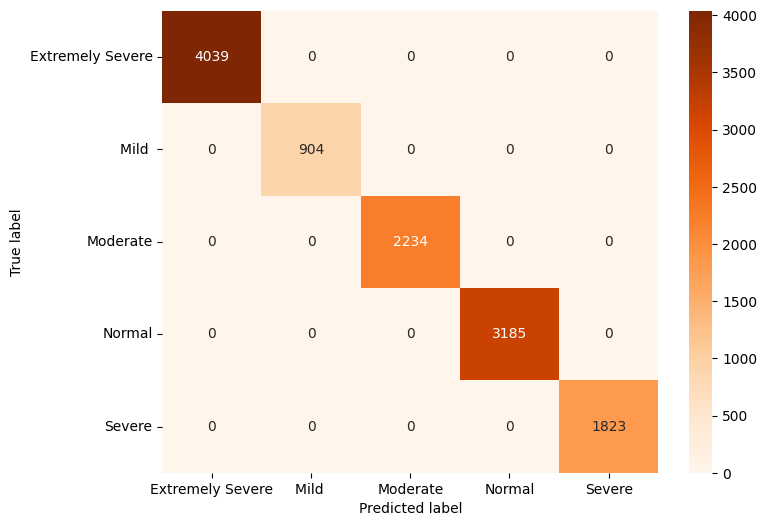

In [ ]:
Svmc=SVC(C=10,gamma=0.1,kernel='rbf').fit(X_train_scaled,y_train)
accu_svm=round(accuracy_score(y_test,Svmc.predict(X_test_scaled)),3)
f1_score_svm=round(f1_score(y_test,Svmc.predict(X_test_scaled),average='weighted'),3)
Precision_svm=round(precision_score(y_test,Svmc.predict(X_test_scaled),average='weighted'),3)
Recall_svm=round(recall_score(y_test,Svmc.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',accu_svm)
print('F1_Score:',f1_score_svm)
print('Recall_Score:',Precision_svm)
print('Precision_Score:',Recall_svm)
print('Cross Validation Score:',(np.mean(cross_val_score(Svmc, X_train_scaled, y_train, cv = 6))))
# Generate predictions with the best model
y_pred = Svmc.predict(X_test_scaled)
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap="Oranges", fmt='g',
            xticklabels=["Extremely Severe", "Mild ", "Moderate", "Normal", "Severe"],
            yticklabels=["Extremely Severe", "Mild ", "Moderate", "Normal", "Severe"])
plt.yticks(rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=Svmc.predict(X_test_scaled))
print(classification)

XGBoost

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [02:20:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split", "splitter" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Accuracy: 0.885
F1_Score: 0.878
Recall_Score: 0.885
Precision_Score: 0.882


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [02:20:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split", "splitter" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [02:20:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split", "splitter" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [02:20:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split", "splitter" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [02:20:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split", "splitter" } are not used.

  warni

Cross Validation Score: 0.889
              precision    recall  f1-score   support

           0     0.9613    0.9661    0.9637      4039
           1     0.7287    0.3684    0.4893       904
           2     0.7760    0.8899    0.8290      2234
           3     0.9298    0.9777    0.9532      3185
           4     0.8259    0.7965    0.8109      1823

    accuracy                         0.8854     12185
   macro avg     0.8443    0.7997    0.8092     12185
weighted avg     0.8816    0.8854    0.8782     12185



Text(70.72222222222221, 0.5, 'True label')

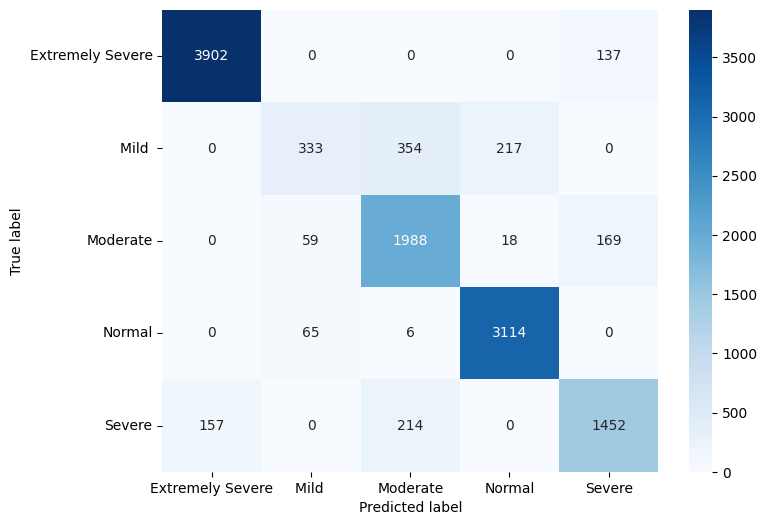

In [ ]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the training labels
y_train_encoded = label_encoder.fit_transform(y_train)

XGB_Model=XGBClassifier(criterion='entropy',splitter='best',min_samples_split=9,min_samples_leaf=2,max_depth=100).fit(X_train_scaled,y_train_encoded)
y_test_encoded = label_encoder.transform(y_test)
accu_XGB=round(accuracy_score(y_test_encoded,XGB_Model.predict(X_test_scaled)),3)
f1_score_XGB=round(f1_score(y_test_encoded,XGB_Model.predict(X_test_scaled),average='weighted'),3)
Recall_XGB=round(recall_score(y_test_encoded,XGB_Model.predict(X_test_scaled),average='weighted'),3)
Precision_XGB=round(precision_score(y_test_encoded,XGB_Model.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',accu_XGB)
print('F1_Score:',f1_score_XGB)
print('Recall_Score:',Recall_XGB)
print('Precision_Score:',Precision_XGB)
print('Cross Validation Score:',round(np.mean(cross_val_score(XGB_Model, X_train_scaled, y_train_encoded, cv = 6)),3))
classification=classification_report(
    digits=4,
    y_true=y_test_encoded,
    y_pred=XGB_Model.predict(X_test_scaled))
print(classification)
# Generate predictions with the best model
y_pred = XGB_Model.predict(X_test_scaled)
# Create the confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt='g',
            xticklabels=["Extremely Severe", "Mild ", "Moderate", "Normal", "Severe"],
            yticklabels=["Extremely Severe", "Mild ", "Moderate", "Normal", "Severe"])
plt.yticks(rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')

# **Resultados**

In [ ]:
Result_2={
                  'Model':['Random-Forest','Decision-Tree','SVM','XGBoost'],
                  'Accuracy(%)':[accu_ran*100,accu_dt*100,accu_svm*100,accu_XGB*100],
                  'F1_Score(%)':[f1_score_ran*100,f1_score_dt*100,f1_score_svm*100,f1_score_XGB*100],
                  'Precision(%)':[Precision_ran*100,Precision_dt*100,Precision_svm*100,Precision_XGB*100],
                  'Recall(%)':[Recall_ran*100,Recall_dt*100,Recall_svm*100,Recall_XGB*100]

                    }
Result_Anxiety=pd.DataFrame(Result_2)

# **Resultados obtenidos desde arriba Modelados**
(Results Achieved from above Modellings)

In [ ]:
Result_Depression

,Model,Accuracy(%),F1_Score(%),Precision(%),Recall(%)
0,Random-Forest,92.3,92.0,92.2,92.3
1,Decision-Tree,79.2,79.3,79.4,79.2
2,SVM,100.0,100.0,100.0,100.0
3,XGBoost,94.0,93.9,93.9,94.0


In [ ]:
Result_Stress

,Model,Accuracy(%),F1_Score(%),Precision(%),Recall(%)
0,Random-Forest,88.5,88.1,88.4,88.5
1,Decision-Tree,74.7,74.9,75.1,74.7
2,SVM,100.0,100.0,100.0,100.0
3,XGBoost,91.6,91.5,91.5,91.6


In [ ]:
Result_Anxiety

,Model,Accuracy(%),F1_Score(%),Precision(%),Recall(%)
0,Random-Forest,84.6,82.3,83.8,84.6
1,Decision-Tree,73.5,73.4,73.2,73.5
2,SVM,100.0,100.0,100.0,100.0
3,XGBoost,88.5,87.8,88.2,88.5


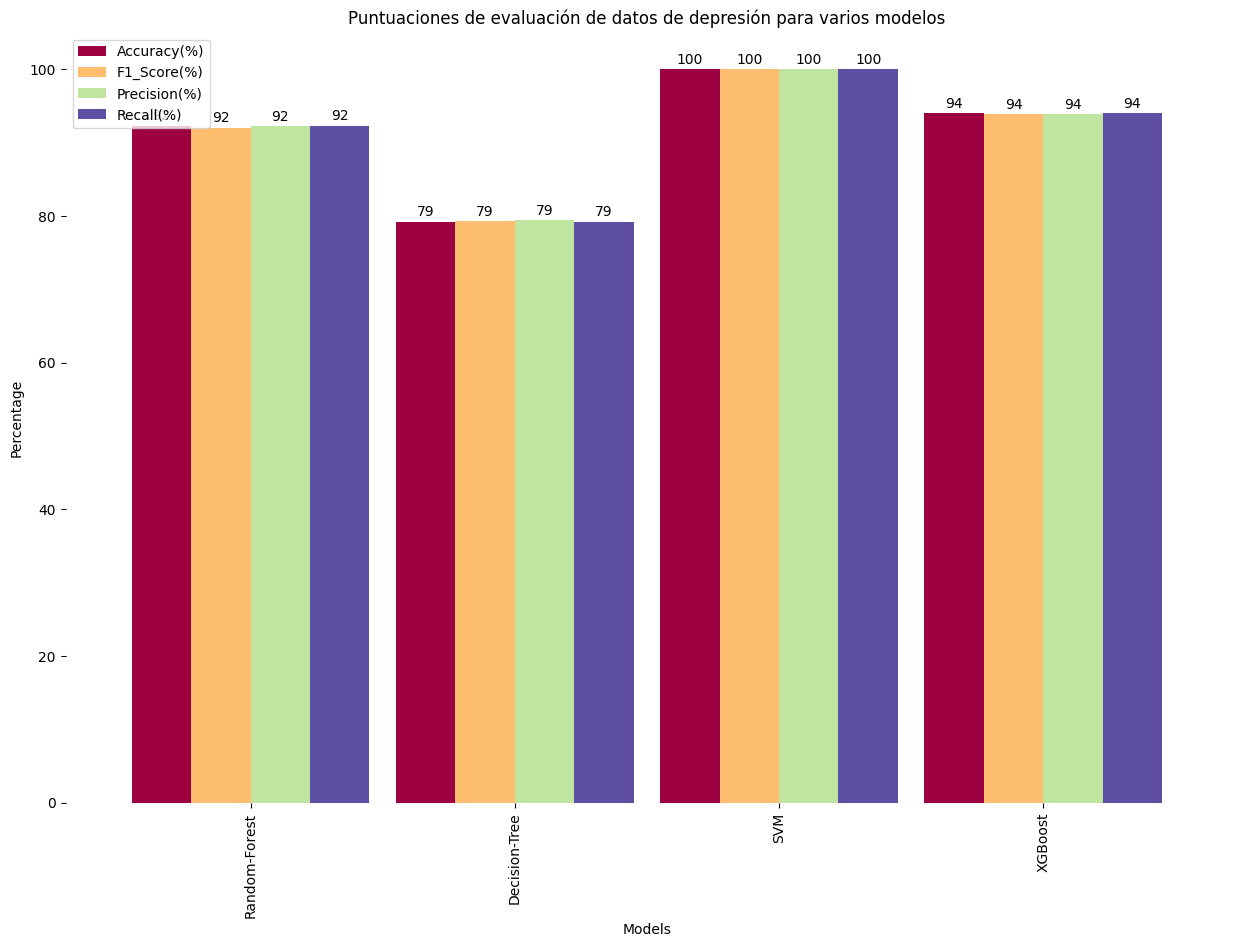

In [ ]:
splot=Result_Depression.plot(x='Model',y=['Accuracy(%)','F1_Score(%)','Precision(%)','Recall(%)'],kind='bar',figsize=(15,10),cmap='Spectral',width=0.9)
for p in splot.patches:
    splot.annotate(format(round(p.get_height()), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0,7),
                   textcoords='offset points')
plt.title('Puntuaciones de evaluación de datos de depresión para varios modelos')
plt.ylabel('Percentage')
plt.xlabel('Models')
plt.legend(loc='upper left')
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()

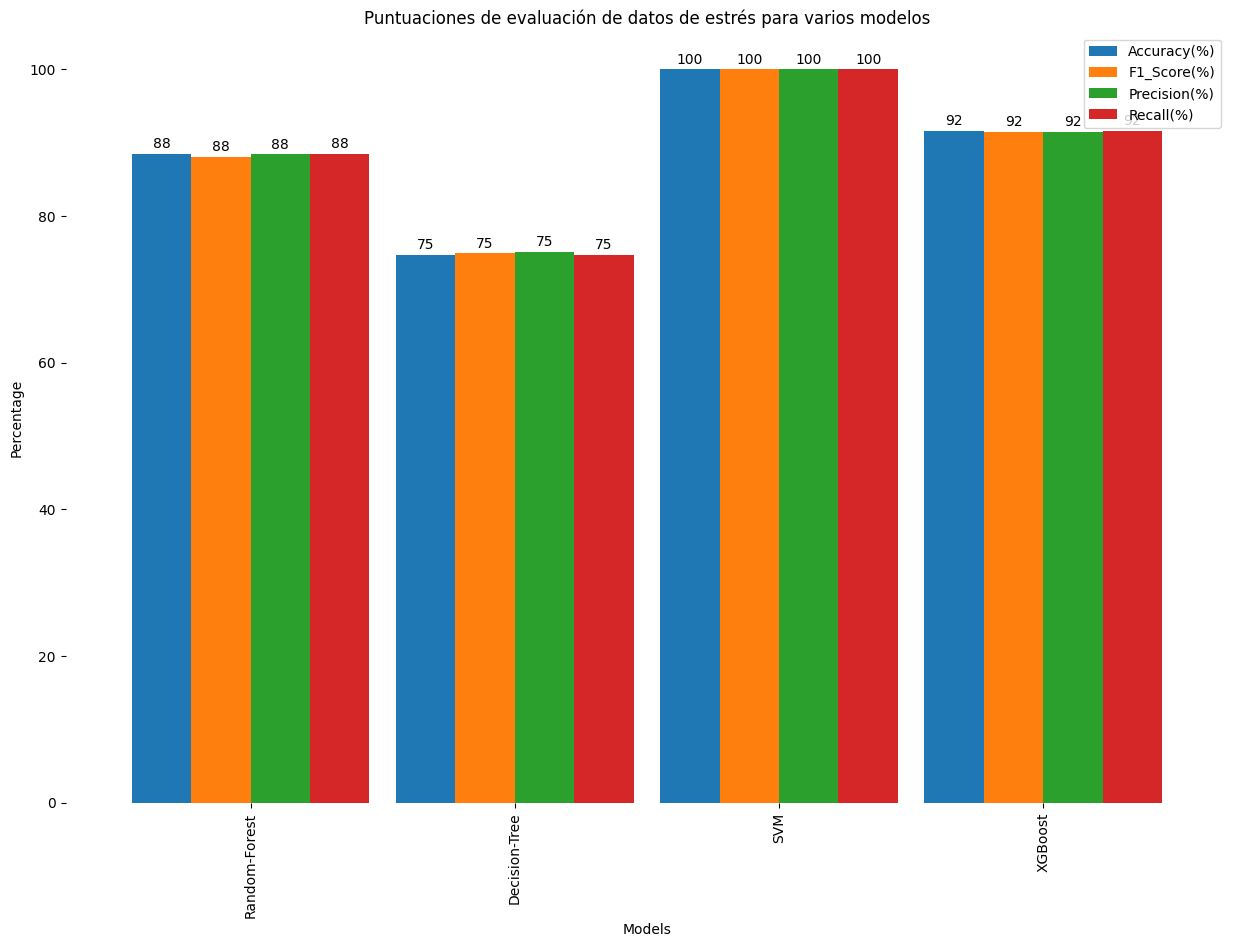

In [ ]:
slot=Result_Stress.plot(x='Model',y=['Accuracy(%)','F1_Score(%)','Precision(%)','Recall(%)'],kind='bar',figsize=(15,10),width=0.9)
for p in slot.patches:
    slot.annotate(format(round(p.get_height()), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 7),
                   textcoords='offset points')
plt.title('Puntuaciones de evaluación de datos de estrés para varios modelos')
plt.ylabel('Percentage')
plt.xlabel('Models')
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()

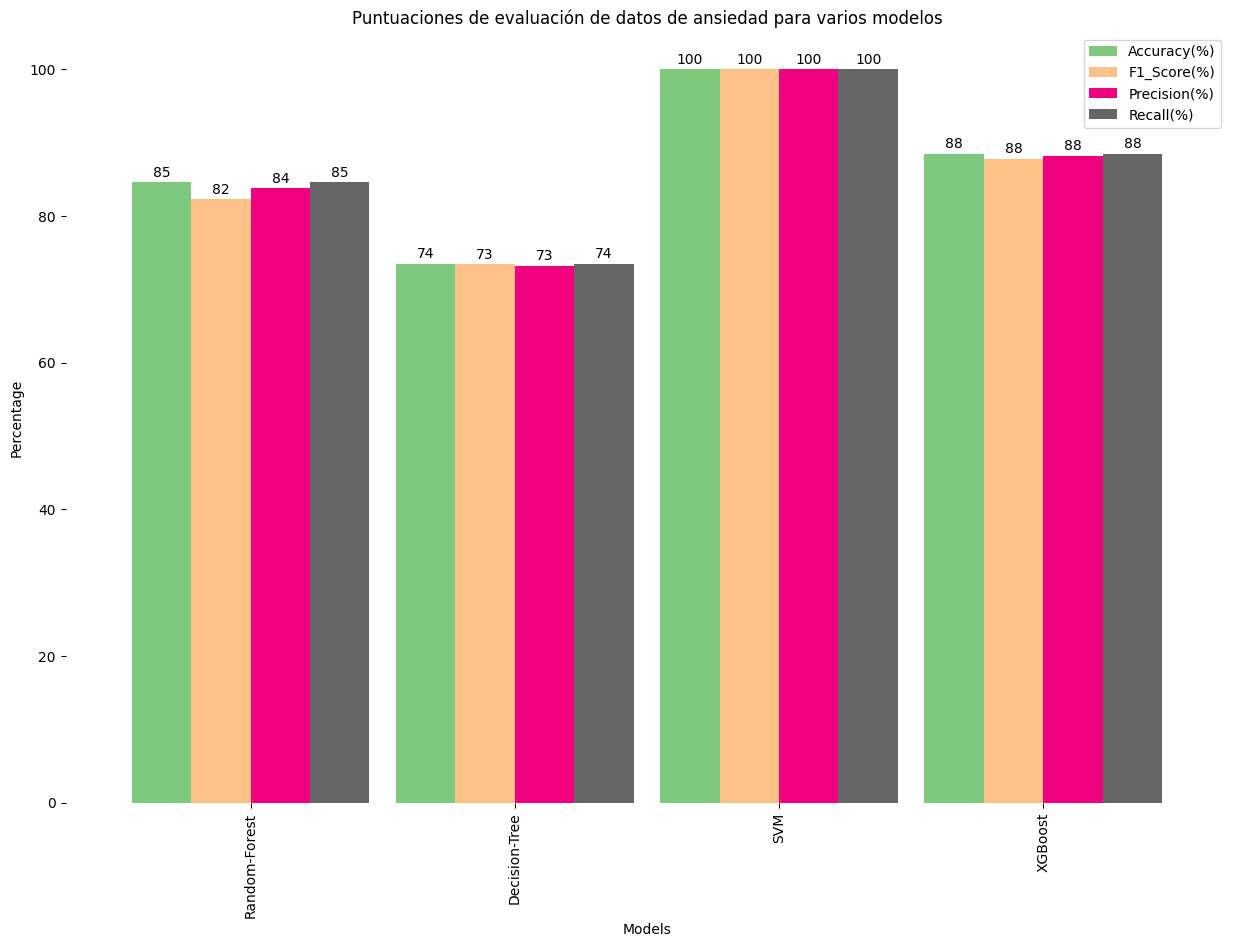

In [ ]:
slot=Result_Anxiety.plot(x='Model',y=['Accuracy(%)','F1_Score(%)','Precision(%)','Recall(%)'],kind='bar',figsize=(15,10),cmap='Accent',width=0.9)
for p in slot.patches:
    slot.annotate(format(round(p.get_height()), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 7),
                   textcoords='offset points')
plt.title('Puntuaciones de evaluación de datos de ansiedad para varios modelos')
plt.ylabel('Percentage')
plt.xlabel('Models')
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()

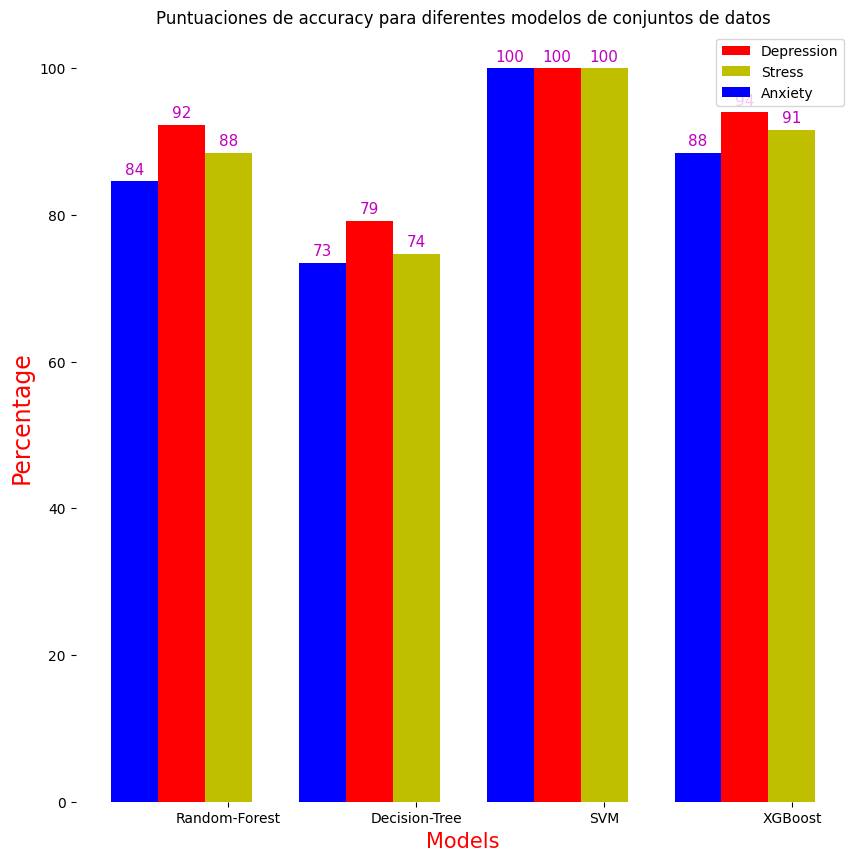

In [ ]:
x=['Random-Forest','Decision-Tree','SVM','XGBoost']
widt=0.25
X=np.arange(len(x))
plt.figure(figsize=(10,10))
bar1=plt.bar(X,Result_Depression['Accuracy(%)'],widt,color='r')
bar2=plt.bar(X+widt,Result_Stress['Accuracy(%)'],widt,color='y')
bar3=plt.bar(X-widt,Result_Anxiety['Accuracy(%)'],widt,color='b')
for bar in bar1:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+1, str(int(bar.get_height())),
                 ha='center', color='m', fontsize=11)
for bar in bar2:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+1, str(int(bar.get_height())),
                 ha='center', color='m', fontsize=11)
for bar in bar3:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+1, str(int(bar.get_height())),
                 ha='center', color='m', fontsize=11)
plt.xticks(X+widt,x)
plt.legend( (bar1, bar2, bar3),('Depression', 'Stress', 'Anxiety'))
plt.title('Puntuaciones de accuracy para diferentes modelos de conjuntos de datos')
plt.ylabel('Percentage',fontsize=17,color='red')
plt.xlabel('Models',fontsize=15,color='red')
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()

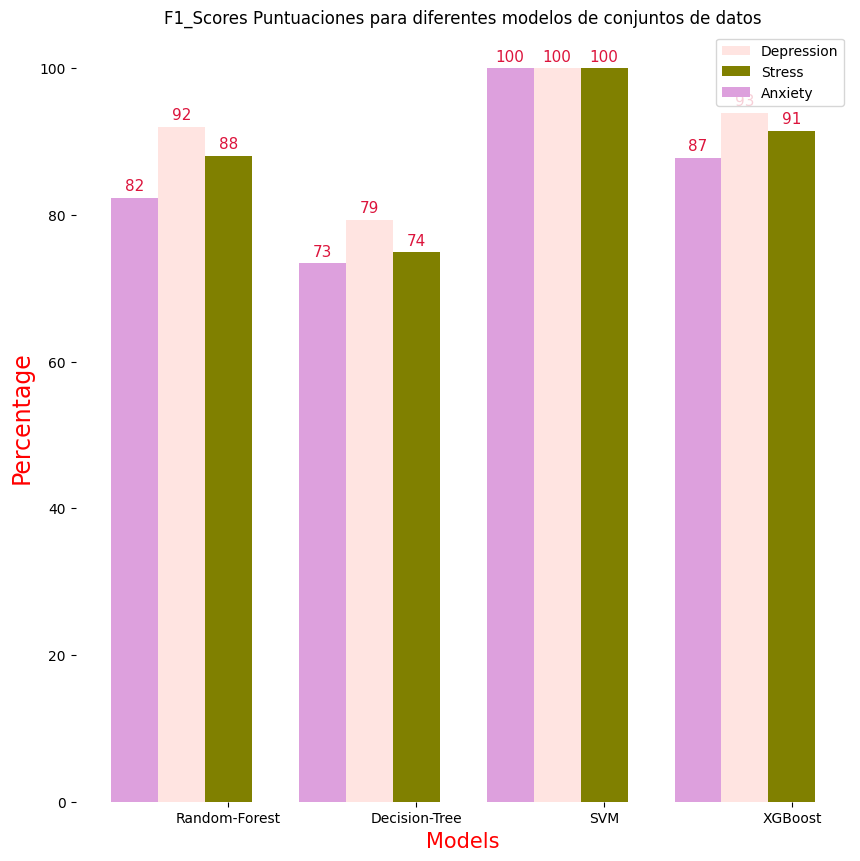

In [ ]:
x=['Random-Forest','Decision-Tree','SVM','XGBoost']
width=0.25
X=np.arange(len(x))
plt.figure(figsize=(10,10))
bar1=plt.bar(X,Result_Depression['F1_Score(%)'],width,color='mistyrose')
bar2=plt.bar(X+width,Result_Stress['F1_Score(%)'],width,color='olive')
bar3=plt.bar(X-width,Result_Anxiety['F1_Score(%)'],width,color='plum')
for bar in bar1:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+1, str(int(bar.get_height())),
                 ha='center', color='crimson', fontsize=11)
for bar in bar2:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+1, str(int(bar.get_height())),
                 ha='center', color='crimson', fontsize=11)
for bar in bar3:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+1, str(int(bar.get_height())),
                 ha='center', color='crimson', fontsize=11)
plt.xticks(X+width,x)
plt.legend( (bar1, bar2, bar3),('Depression', 'Stress', 'Anxiety'))
plt.title('F1_Scores Puntuaciones para diferentes modelos de conjuntos de datos')
plt.ylabel('Percentage',fontsize=17,color='red')
plt.xlabel('Models',fontsize=15,color='red')
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()

In [ ]:
x=['Random-Forest','Decision-Tree','SVM','XGBoost']
width=0.25
X=np.arange(len(x))
plt.figure(figsize=(10,10))
bar1=plt.bar(X,Result_Depression['Precision(%)'],width,color='black')
bar2=plt.bar(X+width,Result_Stress['Precision(%)'],width,color='orange')
bar3=plt.bar(X-width,Result_Anxiety['Precision(%)'],width,color='pink')
for bar in bar1:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+1, str(int(bar.get_height())),
                 ha='center', color='gray', fontsize=11)
for bar in bar2:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+1, str(int(bar.get_height())),
                 ha='center', color='gray', fontsize=11)
for bar in bar3:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+1, str(int(bar.get_height())),
                 ha='center', color='gray', fontsize=11)
plt.xticks(X+width,x)
plt.legend( (bar1, bar2, bar3),('Depression', 'Stress', 'Anxiety'))
plt.title('Puntuaciones de precision para diferentes modelos de conjuntos de datos')
plt.ylabel('Percentage',fontsize=17,color='red')
plt.xlabel('Models',fontsize=15,color='red')
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()

In [ ]:
x=['Random-Forest','Decision-Tree','SVM','XGBoost']
width=0.25
X=np.arange(len(x))
plt.figure(figsize=(10,10))
bar1=plt.bar(X,Result_Depression['Recall(%)'],width,color='indigo')
bar2=plt.bar(X+width,Result_Stress['Recall(%)'],width,color='magenta')
bar3=plt.bar(X-width,Result_Anxiety['Recall(%)'],width,color='violet')
for bar in bar1:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+1, str(int(bar.get_height())),
                 ha='center', color='darkorange', fontsize=11)
for bar in bar2:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+1, str(int(bar.get_height())),
                 ha='center', color='darkorange', fontsize=11)
for bar in bar3:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+1, str(int(bar.get_height())),
                 ha='center', color='darkorange', fontsize=11)
plt.xticks(X+width,x)
plt.legend( (bar1, bar2, bar3),('Depression', 'Stress', 'Anxiety'))
plt.title('Recall puntuaciones para diferentes modelos de conjuntos de datos')
plt.ylabel('Percentage',fontsize=17,color='red')
plt.xlabel('Models',fontsize=15,color='red')
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()